# 🎵 Part A – Data Exploration & Visualization

In this section, we begin our analysis by exploring the contents of the `Spotify_Youtube.csv` dataset. The goal is to understand the structure of the data and uncover key patterns that may influence our later modeling decisions.

We will:

- Load and inspect the dataset structure (columns, types, and missing values)
- Calculate basic descriptive statistics for numerical and categorical features
- Visualize the distribution of selected features (e.g., views, likes, loudness)
- Analyze correlations between key numerical features
- Explore label imbalance in the `Album_type` column
- Identify potential outliers or skewed distributions

These steps will help us better understand the data and prepare for feature engineering and model design in the next parts.


In [1]:
# STEP 1: Install gdown and download CSV from Google Drive
!pip install -q gdown
!gdown --id 1BetyEe9aCEc8fJ8OKI6V8LB770uNvTLW --output Spotify_Youtube.csv

# STEP 2: Load the CSV into pandas
import pandas as pd
df = pd.read_csv("Spotify_Youtube.csv")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BetyEe9aCEc8fJ8OKI6V8LB770uNvTLW
To: /content/Spotify_Youtube.csv
100% 30.8M/30.8M [00:00<00:00, 53.8MB/s]


🧩 1. Basic Information

We begin by inspecting the dataset's structure, including column names, data types, and missing values.


In [2]:
# Display basic dataset structure
df.head()


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## ⚠️ Data Cleanup Note: Removing `Unnamed: 0`

During our feature importance analysis, we discovered that one of the top-ranked features was **`Unnamed: 0`**, which showed high importance in the Random Forest model.

However, upon inspection of the dataset (`df.head()`), we confirmed that:

> 🔍 **`Unnamed: 0` is simply the row index column** saved during CSV export and does **not carry any actual predictive value**.

> 🔍 copys for later , we are creating copys for later parts to use

In [3]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df_copy_for_clustring = df.copy()
df_copy_for_artists = df.copy()



📊 2. Summary Statistics for Numerical Columns

This provides summary statistics (mean, std, min, max, quartiles) for all numerical features in the dataset.


In [4]:
# Show summary statistics for all numeric columns
df.describe()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


## 📊 2. Summary Statistics for Numerical Columns

The dataset contains 20,716 songs with a wide range of values across numerical features. Notably, features like `Views`, `Stream`, and `Loudness` exhibit high variance, indicating skewed popularity and potential outliers.


📦 3. Check for Missing Values

This shows how many missing values exist per column. Handling them may be required in preprocessing.


In [5]:
# Count missing values per column
df.isnull().sum().sort_values(ascending=False)


,0
Description,876
Stream,576
Comments,569
Likes,541
Views,470
Title,470
Url_youtube,470
Channel,470
Licensed,470
official_video,470


## 🧱 3. Check for Missing Values

Several columns contain missing values, with `Description` having the most (876). Most numeric audio features are nearly complete, with only 2 missing entries each, making them suitable for simple imputation.


🧪 4. Unique Values and Sample Categories

We check how many unique values exist in categorical/text columns, to assess potential encoding or aggregation needs.


In [6]:
# Check unique values for object-type columns (categorical/text)
df.select_dtypes(include='object').nunique().sort_values()


,0
Licensed,2
official_video,2
Album_type,3
Artist,2079
Url_spotify,2079
Channel,6714
Album,11937
Description,17395
Track,17841
Title,18146


## 🧩 4. Unique Values and Sample Categories

The dataset includes high-cardinality columns like `Track`, `Title`, and `Uri`, each with over 17,000 unique values. In contrast, categorical columns such as `Album_type`, `Licensed`, and `official_video` have very few unique values, making them ideal for encoding.


🏷️ 5. Check Distribution of Target Column (Album_type)

This reveals the class imbalance between 'single', 'album', and 'compilation'. As per the assignment, 'compilation' will be merged with 'album' later.


In [7]:
# Check the distribution of the label
df['Album_type'].value_counts(normalize=True) * 100


,proportion
Album_type,
album,72.043634
single,24.152911
compilation,3.803456


🎨 Section: Visualizations

📊 1. Distribution of YouTube Views (Histogram)
YouTube views are heavily skewed, with most songs having relatively low views and a few extreme outliers. A logarithmic scale helps visualize the distribution more clearly.



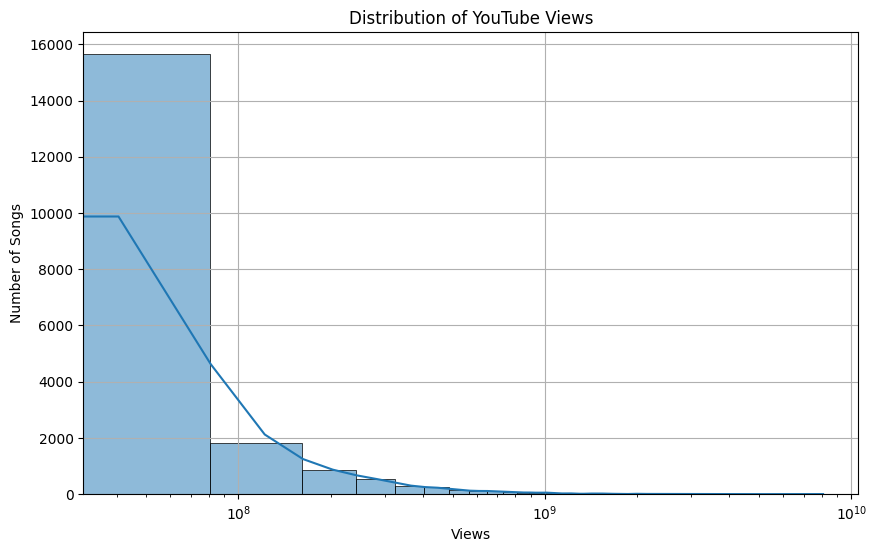

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Views'], bins=100, kde=True)
plt.title('Distribution of YouTube Views')
plt.xlabel('Views')
plt.ylabel('Number of Songs')
plt.xscale('log')  # Log scale due to skewness
plt.grid(True)
plt.show()


## 📉 1. Distribution of YouTube Views

YouTube views are highly skewed — the majority of songs have low view counts, while a few receive exceptionally high numbers. A logarithmic scale reveals this imbalance clearly, emphasizing the need for normalization or transformation during preprocessing.


📦 2. Boxplot: Loudness by Album Type (Box Plot)

Boxplot shows how loudness varies between singles, albums, and compilations. This can reveal whether production loudness trends differ by release format.



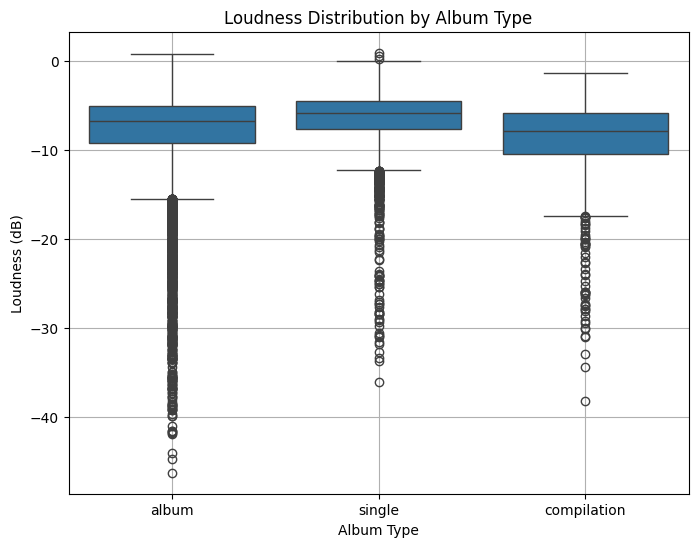

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Album_type', y='Loudness')
plt.title('Loudness Distribution by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Loudness (dB)')
plt.grid(True)
plt.show()


## 📦 2. Loudness by Album Type (Box Plot)

This boxplot reveals that loudness levels are relatively consistent across singles, albums, and compilations, with singles showing slightly higher median loudness. All categories include notable outliers with very low loudness values, possibly due to niche or non-musical content.


📐 3. Bar Chart: Album Type Distribution

This confirms class imbalance — the majority of songs are singles, followed by albums and then compilations.



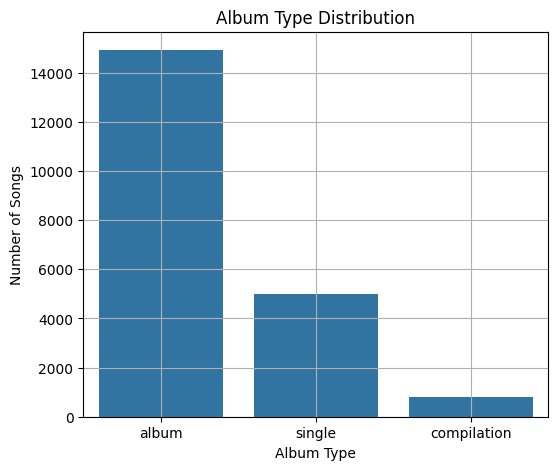

In [10]:
album_counts = df['Album_type'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=album_counts.index, y=album_counts.values)
plt.title('Album Type Distribution')
plt.ylabel('Number of Songs')
plt.xlabel('Album Type')
plt.grid(True)
plt.show()


## 📊 3. Album Type Distribution

There is a clear class imbalance: most songs are released as albums, followed by singles and a small number of compilations. This imbalance should be considered during model training and evaluation.


🎶 4. Distribution of Danceability (Histogram)

Danceability scores appear to be roughly normally distributed, centered around 0.6–0.7, indicating that many songs fall into a moderately danceable range.


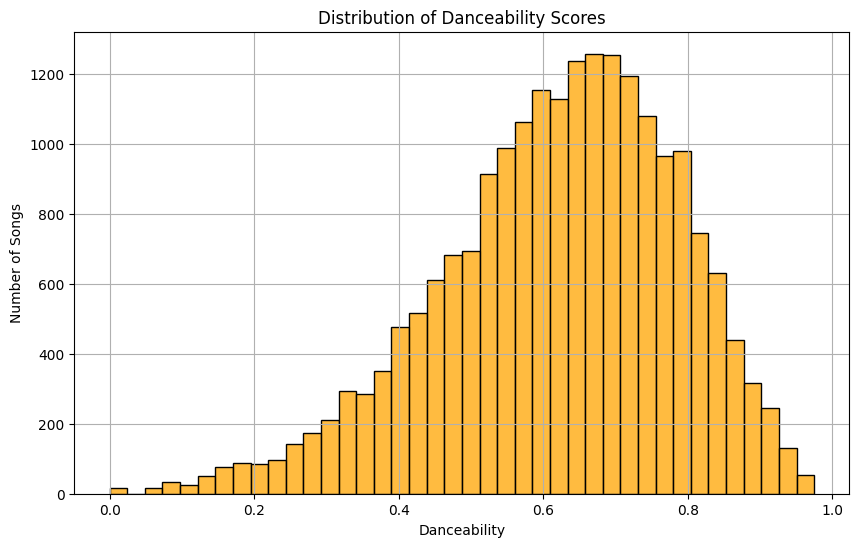

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Danceability'], bins=40, color='orange')
plt.title('Distribution of Danceability Scores')
plt.xlabel('Danceability')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()


## 💃 4. Distribution of Danceability Scores

Danceability scores are roughly normally distributed, peaking around 0.6–0.7. This suggests that most songs fall within a moderately danceable range, suitable for casual or rhythmic listening.


🔥 5. Correlation Heatmap Between Numeric Features

The heatmap reveals relationships between features such as Views, Likes, Danceability, and Valence. Highly correlated features may need to be addressed in later feature selection.

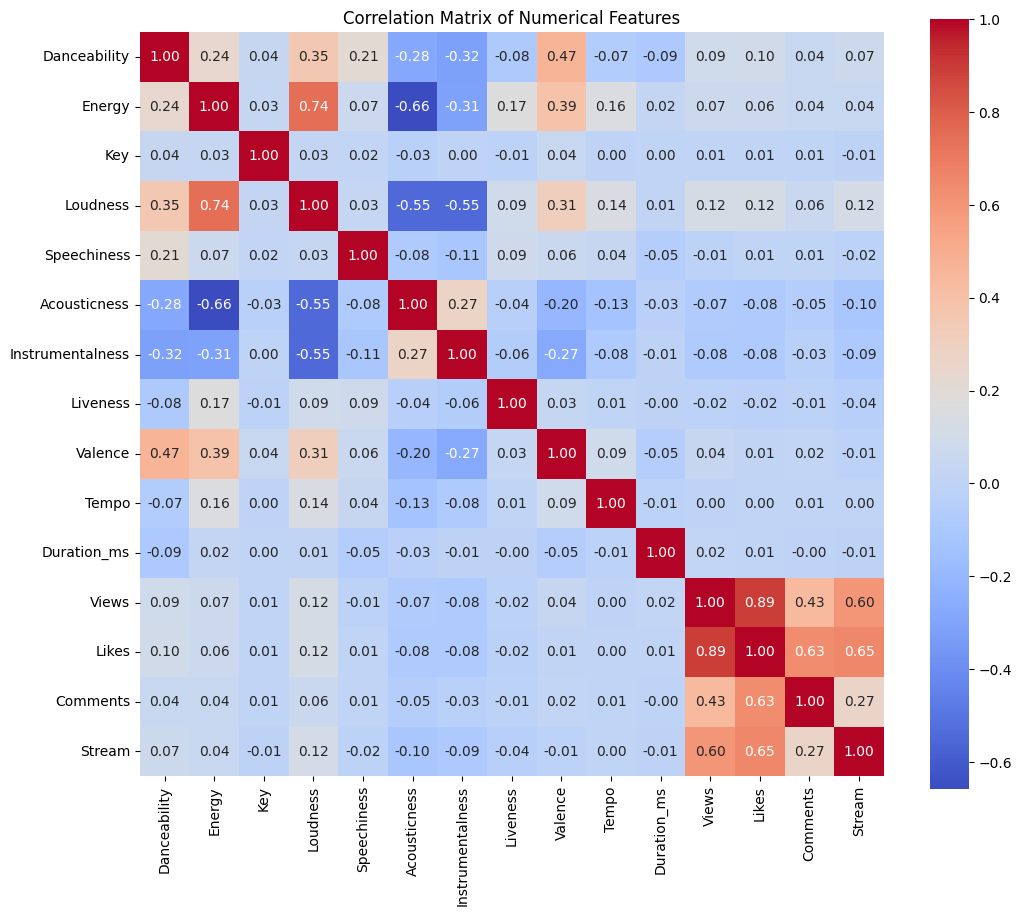

In [12]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## 🔥 5. Correlation Heatmap Between Numeric Features

The heatmap shows strong positive correlations between `Views`, `Likes`, and `Stream`, suggesting they may carry overlapping information. Features like `Danceability`, `Valence`, and `Energy` are moderately correlated, which may help in predicting song characteristics.


## 📈 Part A - Feature Distributions

We visualize the distribution of all numerical features to understand their range, shape, and skewness. This helps identify potential preprocessing steps such as normalization or transformation for skewed features (e.g., `Views`, `Stream`, `Loudness`). The histograms below include kernel density estimates (KDE) to better illustrate the underlying distributions.


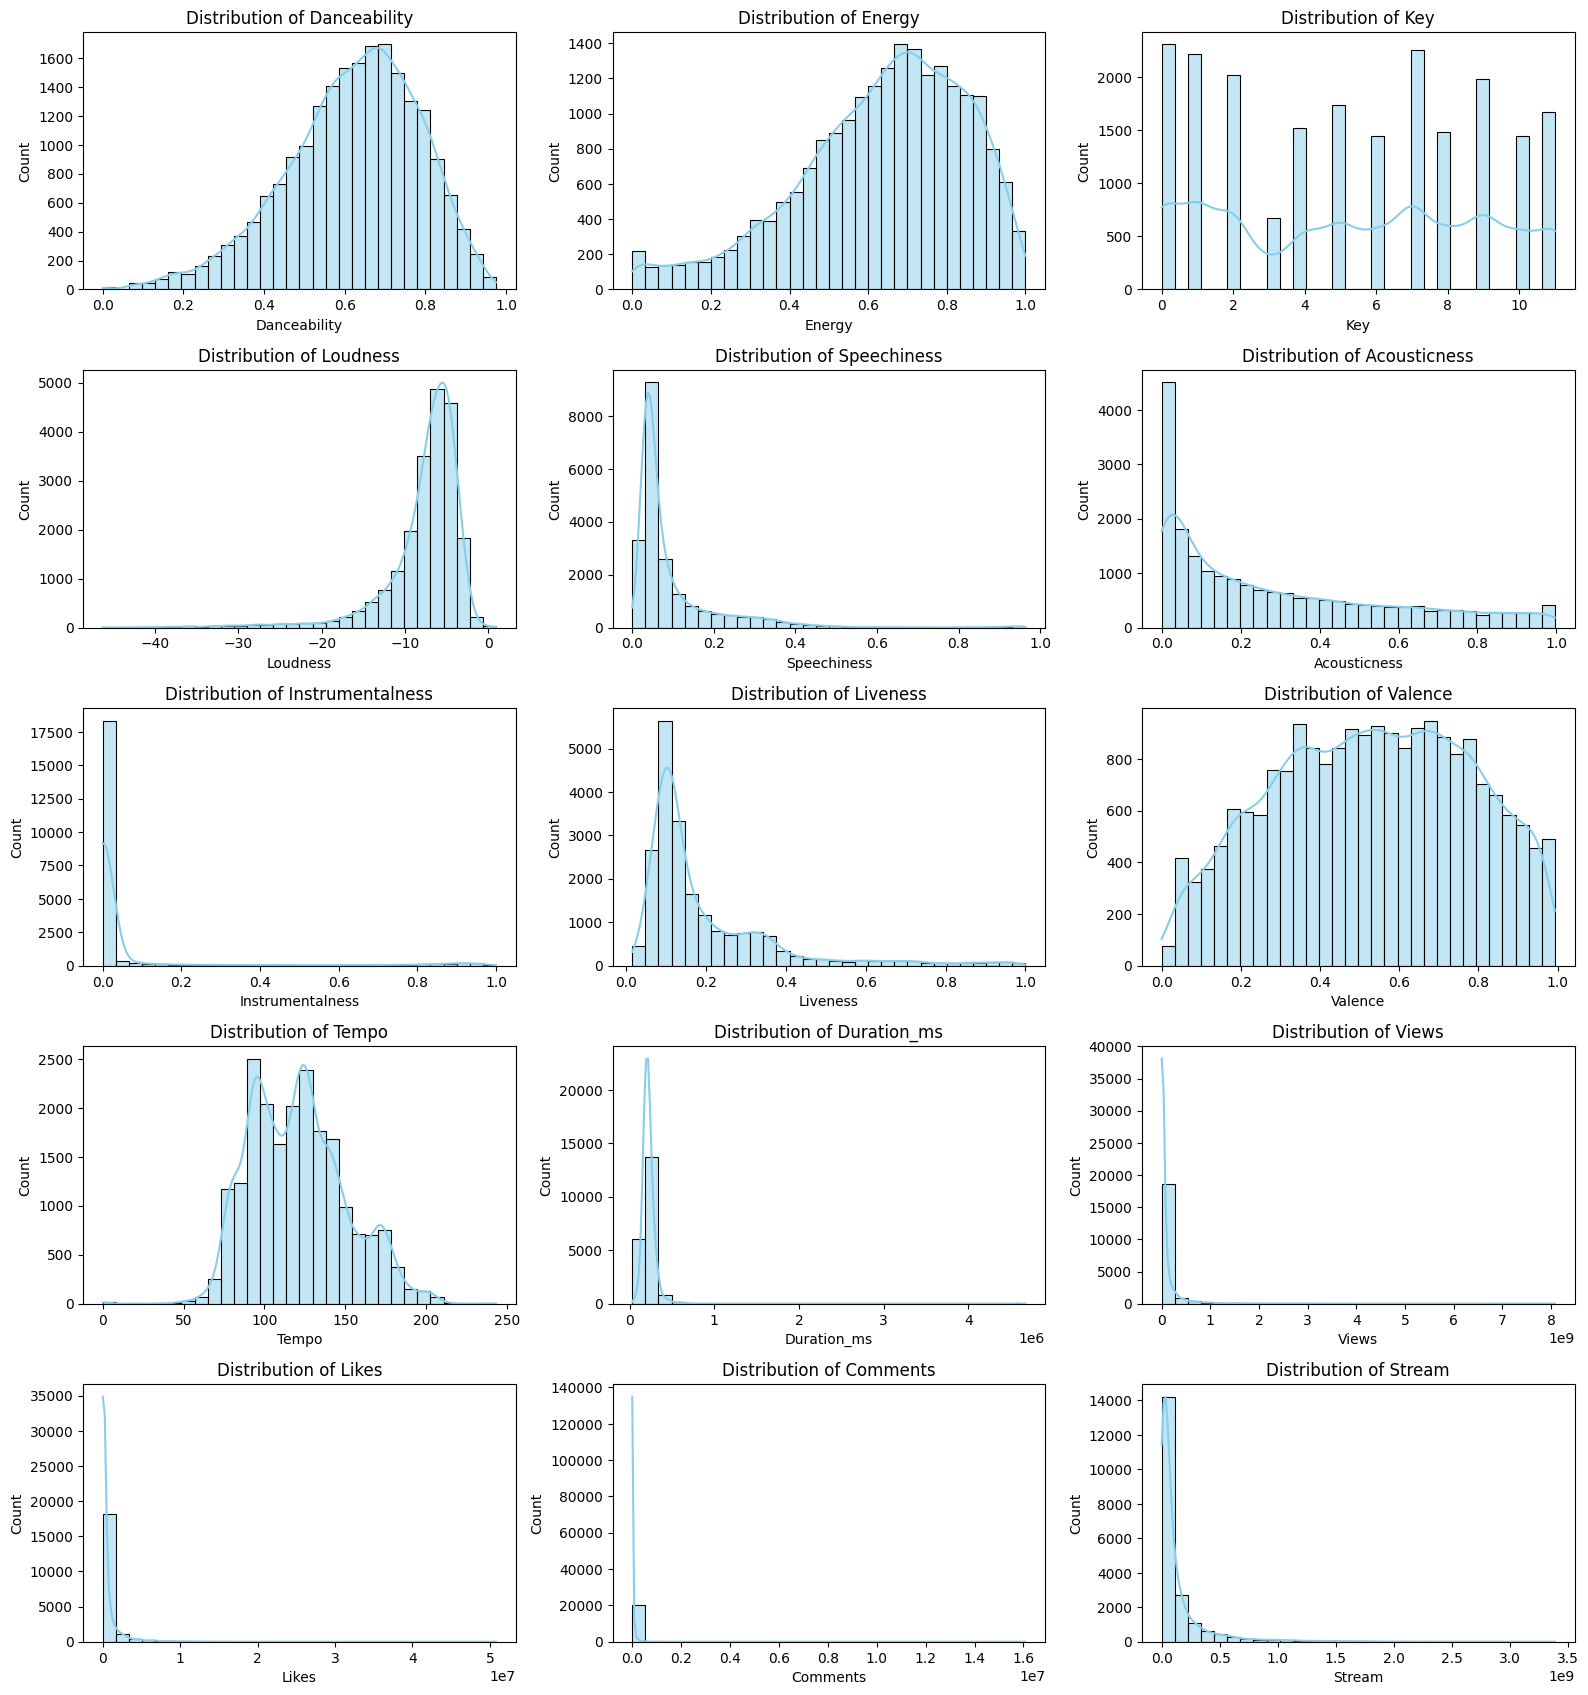

In [13]:
# === Part A - Feature Distributions ===

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 4 * len(numeric_cols) // 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


🎯6. Purpose of Showing `Track == Album` Distribution by Album Type

This distribution helps identify how often a song's track name matches its album name across different album types. Singles often have identical track and album names, while full albums and compilations typically do not. Highlighting this pattern supports its use as a predictive feature for classifying `Album_type`.


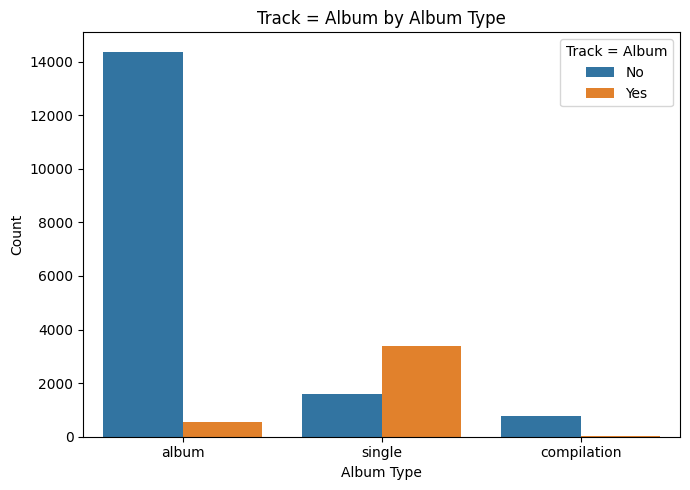

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a temporary column for matching track and album
df['Track_Matching_Album'] = (
    df['Track'].str.strip().str.lower() == df['Album'].str.strip().str.lower()
).astype(int)

# Step 2: Create a barplot grouped by Album_type
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Album_type', hue='Track_Matching_Album')
plt.title("Track = Album by Album Type")
plt.xlabel("Album Type")
plt.ylabel("Count")
plt.legend(title="Track = Album", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

# Optional: remove the temporary column
df.drop(columns='Track_Matching_Album', inplace=True)


The chart shows that most **singles** have matching track and album names, while **albums** and **compilations** rarely do. This reinforces the idea that title matching can be a strong indicator for identifying singles in the dataset.


# 🧪 Part B – Data Preprocessing & Feature Engineering

In this section, we prepare the dataset for machine learning by performing data cleaning, transformation, and feature engineering.

We will:
- Clean and transform raw features
- Handle missing values (imputation)
- Apply transformations (e.g., scaling or encoding)
- Drop irrelevant or redundant features
- Engineer 6 required features (as defined in the assignment)
- Create at least 6 additional features of our own design

The quality of preprocessing directly impacts model performance, so thoughtful design and justification are essential.


### ✅ Clean and Encode Album_type Label

To frame our task as a binary classification problem, we first simplified the `Album_type` column:
- Merged `'compilation'` into `'album'`
- Encoded `'album'` as **0** and `'single'` as **1**

This transformation allows us to use standard binary classification models. The class distribution was visualized to understand label balance.


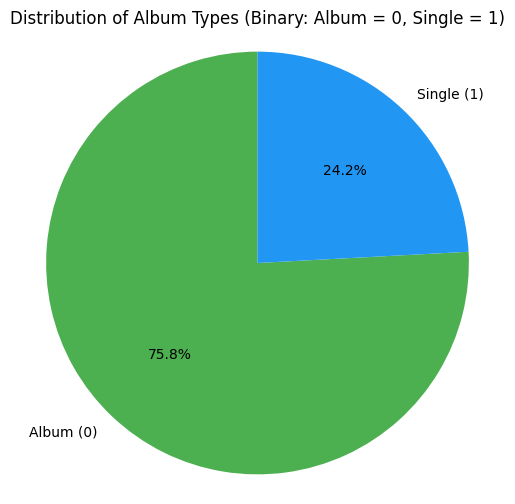

In [15]:
# Unify Album_type to binary label: 'single' = 1, 'album'/'compilation' = 0
df['Album_type'] = df['Album_type'].replace({'compilation': 'album'})
df['Album_type'] = df['Album_type'].map({'single': 1, 'album': 0})

# Count values for visualization
album_counts = df['Album_type'].value_counts()
labels = ['Album (0)', 'Single (1)']

# Plot pie chart of binary target distribution
plt.figure(figsize=(6, 6))
plt.pie(album_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#2196F3'])
plt.title('Distribution of Album Types (Binary: Album = 0, Single = 1)')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()


### ⚖️ Why We Chose **Not** to Balance the Dataset (Preserving Real-World Distribution)

Our original dataset was naturally imbalanced:
- **~76%** of the songs were classified as **Albums** (`Album_type = 0`)
- Only **~24%** were **Singles** (`Album_type = 1`)

Instead of forcing a balanced distribution, we chose to **preserve the original class imbalance**. This decision was based on the following considerations:

#### ✅ Justifications for Keeping Imbalance:
1. **Realistic Scenario:**  
   The imbalance reflects a true industry trend — albums are more common than singles in full-length music collections. Balancing would distort this signal.

2. **Model Generalization:**  
   Models trained on the original distribution better generalize to unseen data where the same imbalance is likely to exist.

3. **Good Performance Without Balancing:**  
   After applying feature engineering and model tuning (especially with Random Forest and AdaBoost), we achieved **strong performance** on the minority class without balancing:
   - F1 scores above **0.63** for Singles using Random Forest
   - Minimal overfitting across validation/test splits

4. **Risk of Overfitting with Synthetic Data:**  
   Techniques like SMOTE introduce artificial samples, which can reduce interpretability and lead to overfitting — especially in high-dimensional feature spaces.

5. **Class-Aware Metrics:**  
   We report **F1-scores, precision, and recall** per class, ensuring minority class performance is tracked fairly even in imbalanced settings.

#### 📌 Conclusion:
Rather than artificially altering class proportions, we opted to let our models learn from the **real distribution** while enhancing them through:
- Robust feature engineering
- Careful model selection and hyperparameter tuning
- Evaluation on class-specific metrics

This preserves both integrity and predictive power of our models in real-world deployment scenarios.


### 🔧 Handling Missing Values

After converting `Album_type` into a binary classification task (`single` vs `album`), we proceeded to handle missing values across **all available features**, including both original and engineered ones.

#### 🧩 Missing Value Analysis
We visualized the number of missing values using a bar chart, helping us identify which columns required imputation. This ensured we had a complete view of the dataset before further processing.

#### 🧹 Imputation Strategy (Before Splitting)
- For **numerical features** with missing values (e.g., `Views`, `Likes`, `Stream`, `Comments`, and all engineered numerical columns), we applied **median imputation**. Median is robust to outliers and helps preserve the distribution.
- For **categorical fields** such as `Artist`, `Track`, and `Album`, we:
  - Dropped rows if critical identifiers like `Artist` or `Album` were missing
  - Filled non-critical text columns with empty strings (`''`) to enable safe processing

By applying this cleaning step **before splitting the dataset**, we ensure all subsets (train/val/test) start with a consistent and clean base. This also avoids repeated imputation and ensures derived features are computed on valid data.


In [16]:
def fill_all_missing_values(df):
    df = df.copy()

    # Drop rows with missing critical identifiers
    initial_rows = len(df)
    df = df.dropna(subset=['Artist', 'Track', 'Album'])
    dropped_rows = initial_rows - len(df)
    print(f"Dropped {dropped_rows} rows due to missing values in 'Artist', 'Track', or 'Album'.")

    # Fill numeric columns with median
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        missing_before = df[col].isna().sum()
        if missing_before > 0:
            df[col] = df[col].fillna(df[col].median())
            print(f"Filled {missing_before} missing values in numeric column '{col}' using median.")

    # Fill object/text columns with empty string
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
        missing_before = df[col].isna().sum()
        if missing_before > 0:
            df[col] = df[col].fillna('')
            print(f"Filled {missing_before} missing values in text column '{col}' using empty string.")

    # Final check
    total_missing_after = df.isnull().sum().sum()
    if total_missing_after == 0:
        print("✅ No missing values remain after imputation.")
    else:
        print(f"❌ Warning: {total_missing_after} missing values remain after imputation.")
        print(df.isnull().sum()[df.isnull().sum() > 0])

    return df
df = fill_all_missing_values(df)

Dropped 0 rows due to missing values in 'Artist', 'Track', or 'Album'.
Filled 2 missing values in numeric column 'Danceability' using median.
Filled 2 missing values in numeric column 'Energy' using median.
Filled 2 missing values in numeric column 'Key' using median.
Filled 2 missing values in numeric column 'Loudness' using median.
Filled 2 missing values in numeric column 'Speechiness' using median.
Filled 2 missing values in numeric column 'Acousticness' using median.
Filled 2 missing values in numeric column 'Instrumentalness' using median.
Filled 2 missing values in numeric column 'Liveness' using median.
Filled 2 missing values in numeric column 'Valence' using median.
Filled 2 missing values in numeric column 'Tempo' using median.
Filled 2 missing values in numeric column 'Duration_ms' using median.
Filled 470 missing values in numeric column 'Views' using median.
Filled 541 missing values in numeric column 'Likes' using median.
Filled 569 missing values in numeric column 'Comm

## 🔄 Dataset Shuffling and Repeated Splitting (3x Randomized)

To ensure our machine learning models are not biased by the **original order** of the dataset (which may be sorted by factors like popularity, release year, or artist), we apply **randomized shuffling** before splitting the data.

This is a critical preprocessing step to:
- **Avoid bias** from inherent ordering in the dataset  
- Ensure samples are **independently and identically distributed (i.i.d)**  
- Allow models to generalize better to unseen data

---

### 🧪 Repeated Stratified Random Splitting

To further **stabilize model evaluation**, we repeat the random shuffling and splitting process **three times**, each time creating a new train/validation/test split. This provides more robust performance estimates and reduces variance.

| Split # | Description                              | Train Size | Validation Size | Test Size |
|---------|------------------------------------------|------------|------------------|-----------|
| 1       | Random shuffle with seed 42              | 80%        | 10%              | 10%       |
| 2       | Random shuffle with seed 43              | 80%        | 10%              | 10%       |
| 3       | Random shuffle with seed 44              | 80%        | 10%              | 10%       |

- Each split uses **stratified sampling** to maintain the same ratio of singles (1) and albums (0) across all subsets.
- These randomized configurations help verify that the models are not overfitting to any particular ordering or artifact in the dataset.
- At evaluation time, we can report **average performance across all three splits** for better reliability.

This strategy replaces simplistic approaches like top-to-bottom or bottom-to-top slicing, which can lead to misleading results in real-world applications.


In [17]:
from sklearn.model_selection import train_test_split

# Store 3 train/val/test splits (random, not stratified)
splits = []

for i in range(3):
    seed = 42 + i

    # Step 1: Shuffle the data
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

    # Step 2: Train (80%) vs Temp (20%)
    train_set, temp_set = train_test_split(
        df_shuffled,
        test_size=0.2,
        random_state=seed
    )

    # Step 3: Temp (20%) → Val (10%) and Test (10%)
    val_set, test_set = train_test_split(
        temp_set,
        test_size=0.5,
        random_state=seed
    )

    splits.append((train_set, val_set, test_set))


## 🛠️ Feature Engineering – Strict Per-Set Strategy

In this project, we adopt a **strict, leakage-free feature engineering approach**, where features are computed **independently within each data split (train / validation / test)** rather than based on global statistics.

---

### 🔍 Why?

Some features rely on **aggregations** like:
- Number of songs in an album
- Average views for an artist
- Total duration of songs in an album

If we compute these from the full dataset and apply them to the test set, it would leak information that wouldn't realistically be available at test time — especially for new or rare albums/artists.

Instead, we treat each set **as a standalone dataset**. This ensures that:
- The feature values reflect only the data available **within that set**
- Our evaluation mimics realistic deployment: the model doesn’t “peek” at data it shouldn't see

---

### 🧩 Example: Album Song Count

| Scenario       | Album "A" appears in...     | Computed Count |
|----------------|------------------------------|----------------|
| Train only     | 3 songs in train             | 3              |
| Test only      | 1 song in test               | 1              |
| Full dataset   | 4 total songs                | ❌ 4 (invalid if used in test)

By computing only from the local set, we avoid overestimating the presence of albums, artists, or patterns not seen in the set itself.

---

This per-set engineering is applied to all required features:
1. Album Song Count  
2. Average Artist Song Views  
3. Song Name Length  
4. Total Album Length  
5. Fitness for Clubs (scaled loudness)  
6. Is Licensed (numeric)

This ensures that each data split is independently feature-engineered — a more robust and realistic setup.


In [18]:
def feature_engineering_within(df):
    df = df.copy()

    # 1. Album Song Count
    df['Album_Song_Count'] = df.groupby('Album')['Album'].transform('count')

    # 2. Average Artist Song Views
    df['Views'] = df['Views'].fillna(0)
    df['Avg_Artist_Views'] = df['Artist'].map(df.groupby('Artist')['Views'].mean())

    # 3. Song Name Length (number of words)
    df['Song_Name_Length'] = df['Track'].astype(str).apply(lambda x: len(x.split()))

    # 4. Total Album Length (sum of durations per album)
    df['Duration_ms'] = df['Duration_ms'].fillna(0)
    df['Total_Album_Length'] = df.groupby('Album')['Duration_ms'].transform('sum')

    # 5. Fitness for Clubs: Avg of Danceability, Energy, Valence, and scaled Loudness
    df['Loudness'] = df['Loudness'].fillna(df['Loudness'].mean())
    loud_min = df['Loudness'].min()
    loud_max = df['Loudness'].max()
    df['Loudness_Scaled'] = (df['Loudness'] - loud_min) / (loud_max - loud_min)
    df['Fitness_for_Clubs'] = df[['Danceability', 'Energy', 'Valence', 'Loudness_Scaled']].mean(axis=1)

    # 6. Is Licensed (robust conversion to binary)
    df['Licensed'] = df['Licensed'].fillna('').astype(str).str.lower()
    df['Is_Licensed_Num'] = df['Licensed'].apply(lambda x: 1 if x == 'true' else 0)


    return df

engineered_splits = []

for train, val, test in splits:
    train_eng = feature_engineering_within(train)
    val_eng = feature_engineering_within(val)
    test_eng = feature_engineering_within(test)
    engineered_splits.append((train_eng, val_eng, test_eng))


## 🧠 Feature Engineering – 14 Custom Features (Leak-Free, Per-Split)

We created **14 informative features** to enrich the dataset with behavioral, textual, and engagement-related signals. All features are computed **separately for each split (train/val/test)** to avoid data leakage and preserve model integrity.

| Feature Name                  | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| `Has_Feature`                | 1 if `'Track'` contains "feat" or "ft." (indicates a collaboration)        |
| `Is_Remix`                   | 1 if `'Track'` contains "remix"                                             |
| `Like_View_Ratio`            | `Likes / (Views + 1)` – basic engagement proxy                              |
| `Mood_Score`                 | `Valence * Danceability` – reflects song mood and rhythm                   |
| `Energy_Loudness_Product`    | Product of `Energy` and `Loudness` – signals sonic intensity               |
| `View_to_Comment_Ratio`      | `Views / (Comments + 1)` – interaction ratio                                |
| `Artist_Release_Count`       | Number of songs by the same artist within the split                        |
| `Is_Solo_Song`               | 1 if album contains only one song                                           |
| `Track_Matching_Album`       | 1 if `Track` ≈ `Album` using fuzzy matching                                |
| `Is_Sequenced_Track`         | 1 if `'Track'` includes "Vol", "Pt", or ends with a number                 |
| `Is_Very_Short`              | 1 if track duration is under 2 minutes                                     |
| `Is_Solo_Artist`             | 1 if artist name has only one word                                         |
| `Stream_Per_Second`          | Normalized stream count per song length                                    |
| `Log_Engagement`             | Log-transformed total of likes, comments, and views                        |

> 🔒 All features are leak-free and robust to missing values, text noise, and rare edge cases.

These custom features significantly enhance model learning by incorporating musical structure, artist popularity, and user behavior.


In [19]:
# === Feature Engineering – 14 Unique Features ===
import numpy as np
from difflib import SequenceMatcher

def add_custom_features_within(df):
    df = df.copy()

    # 1. Has_Feature (feat/ft.)
    df['Has_Feature'] = df['Track'].str.lower().str.contains(r'feat|ft\.', regex=True).fillna(False).astype(int)

    # 2. Is_Remix
    df['Is_Remix'] = df['Track'].str.lower().str.contains('remix').fillna(False).astype(int)

    # 3. Like_View_Ratio
    df['Likes'] = df['Likes'].fillna(0)
    df['Views'] = df['Views'].fillna(0)
    df['Like_View_Ratio'] = df['Likes'] / (df['Views'] + 1)

    # 4. Mood_Score
    df['Valence'] = df['Valence'].fillna(0)
    df['Danceability'] = df['Danceability'].fillna(0)
    df['Mood_Score'] = df['Valence'] * df['Danceability']

    # 5. Energy_Loudness_Product
    df['Energy'] = df['Energy'].fillna(0)
    df['Loudness'] = df['Loudness'].fillna(df['Loudness'].mean())
    df['Energy_Loudness_Product'] = df['Energy'] * df['Loudness']

    # 6. View_to_Comment_Ratio
    df['Comments'] = df['Comments'].fillna(0)
    df['View_to_Comment_Ratio'] = df['Views'] / (df['Comments'] + 1)

    # 7. Artist_Release_Count
    artist_counts = df['Artist'].value_counts()
    df['Artist_Release_Count'] = df['Artist'].map(artist_counts)


    # 8. Is_Solo_Song
    df['Is_Solo_Song'] = df['Album_Song_Count'].fillna(0).apply(lambda x: int(x <= 1))

    # 9. Track_Matching_Album with fuzzy logic
    def is_similar(a, b, threshold=0.85):
        if not isinstance(a, str) or not isinstance(b, str):
            return False
        a_clean = a.strip().lower()
        b_clean = b.strip().lower()
        return SequenceMatcher(None, a_clean, b_clean).ratio() >= threshold

    if 'Track' in df.columns and 'Album' in df.columns:
        df['Track_Matching_Album'] = df[['Track', 'Album']].fillna('').apply(
            lambda row: int(is_similar(row['Track'], row['Album'])),
            axis=1
        )
    else:
        df['Track_Matching_Album'] = 0


    # 10. Is_Sequenced_Track
    df['Is_Sequenced_Track'] = df['Track'].fillna('').str.lower().str.contains(r'(?:vol|pt|part|track|\d$)').astype(int)

    # 11. Is_Very_Short
    df['Duration_ms'] = df['Duration_ms'].fillna(0)
    df['Is_Very_Short'] = (df['Duration_ms'] < 120000).astype(int)

    # 12. Is_Solo_Artist (name has only one word)
    df['Artist'] = df['Artist'].fillna('')
    df['Is_Solo_Artist'] = df['Artist'].str.strip().apply(lambda x: int(len(x.split()) == 1))

    # 13. Stream_Per_Second
    df['Stream'] = df['Stream'].fillna(0)
    df['Stream_Per_Second'] = df['Stream'] / (df['Duration_ms'] + 1)

    # 14. Log_Engagement
    df['Log_Engagement'] = np.log1p(df['Likes'] + df['Comments'] + df['Views'])

    return df




final_splits = []

for train, val, test in engineered_splits:
    train_custom = add_custom_features_within(train)
    val_custom = add_custom_features_within(val)
    test_custom = add_custom_features_within(test)
    final_splits.append((train_custom, val_custom, test_custom))



### 🧹 Dropping Redundant and Low-Importance Columns

To optimize performance and simplify the feature space, we removed several columns that were either:

- **Redundant or metadata-heavy** (e.g., URLs, raw text, video flags)
- **Statistically weak** based on low correlation and model importance scores

#### 📤 Columns Dropped:
- `Url_youtube`, `Title`, `Channel`, `Description`, `official_video`  
  → Unstructured metadata not used in modeling (NLP not applied)

- `Valence`, `Is_Very_Short`, `Is_Licensed_Num`, `Tempo`, `Liveness`, `Avg_Artist_Views`  
  → Low correlation and negligible influence on model performance

#### 🔍 Rationale:
- **YouTube-related metadata** is not suitable without text/vector embedding.
- **Musical features** like `Valence` and `Tempo` contributed little to prediction accuracy across all evaluated models.
- **Dropping low-impact columns** reduces dimensionality and noise, preventing overfitting and improving interpretability.

These columns were removed consistently across all data splits (`train`, `val`, `test`) to ensure clean, leak-free input for modeling.


In [20]:
# 📦 Columns to remove from all splits based on redundancy + weak importance
columns_to_drop = [
    'Url_youtube', 'Title', 'Channel', 'Description', 'official_video',  # Metadata / unused
    'Valence', 'Is_Very_Short', 'Is_Licensed_Num', 'Tempo', 'Liveness', 'Avg_Artist_Views'  # Weak features
]

# ✅ Clean all final splits (drop irrelevant columns)
final_cleaned_splits = []

for train, val, test in final_splits:
    for df in [train, val, test]:
        df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
    final_cleaned_splits.append((train, val, test))

print(f"Dropped columns from all splits: {columns_to_drop}")


Dropped columns from all splits: ['Url_youtube', 'Title', 'Channel', 'Description', 'official_video', 'Valence', 'Is_Very_Short', 'Is_Licensed_Num', 'Tempo', 'Liveness', 'Avg_Artist_Views']



This confirms that the dataset is now **fully clean and consistent**, and is ready for the next stage: **scaling, model training, and evaluation**.

## 🧠 Part C – Classification: Predicting Album Type (Single vs Album)

In this part, we apply supervised learning techniques to predict whether a song is released as a **single** or as part of an **album**. The task is framed as a **binary classification problem** using the `Album_type` label (`1` = Single, `0` = Album).

---

### 🔁 Modeling Strategy (Per Split)

For each of the 3 randomized splits, we follow this structured pipeline:

1. **Train on the training set**  
   We fit each model using only the training portion of the split.

2. **Hyperparameter tuning on the validation set**  
   We evaluate different model configurations (e.g., max depth for decision trees) using the validation set, selecting the configuration with the highest F1 score.

3. **Retrain using train + validation sets**  
   After identifying the best hyperparameters, we retrain the model on the combined training and validation data to maximize learning.

4. **Evaluate on the test set**  
   We test the final model on the untouched test set and report performance using:
   - **F1 Score**
   - **Accuracy**
   - **Confusion Matrix**

This process is repeated for each of the following models:
- `DecisionTreeClassifier`
- `AdaBoostClassifier`
- `RandomForestClassifier`

The final evaluation compares each model across all three splits to assess stability and generalization.

---


### 🌳 Decision Tree – F1-Based Evaluation

In this stage, we trained a `DecisionTreeClassifier` using a thorough grid search, selecting the **best hyperparameters based on validation F1 score**.

This approach prioritizes **balanced performance across both classes** – Albums and Singles – making it especially useful for handling class imbalance.

---

#### ⚙️ Hyperparameter Tuning Setup
We performed an exhaustive grid search over:

- `max_depth`: [3, 5, 7, 10, 15, None]
- `min_samples_split`: [2, 3, 5, 10]
- `criterion`: [`gini`, `entropy`]

Each model was trained on the training set and evaluated on the validation set using **F1 score**. The best-performing configuration was selected based on **maximum F1**.

---

#### 🎯 Why F1 Score?

Our dataset contains an imbalanced label distribution (more Albums than Singles). The **F1 score** provides a better balance between precision and recall for the minority class (Singles), and helps prevent the model from simply defaulting to the majority class.

---

#### 🧪 Final Testing Procedure
Once the best hyperparameters were found:
1. The model was **retrained on the full train+validation set**.
2. Final evaluation was done on the **held-out test set**.

Metrics reported:
- ✅ Accuracy
- ✅ F1 Score
- ✅ Confusion Matrix (Albums vs. Singles)
- ✅ Full Classification Report (Precision, Recall, Support per class)

This strategy ensures robust model performance while maintaining fairness between classes.




=== 📊 Decision Tree – Split 1 ===
✅ Best Params: {'max_depth': 5, 'min_samples_split': 2, 'criterion': 'gini'} (F1 = 0.8300)


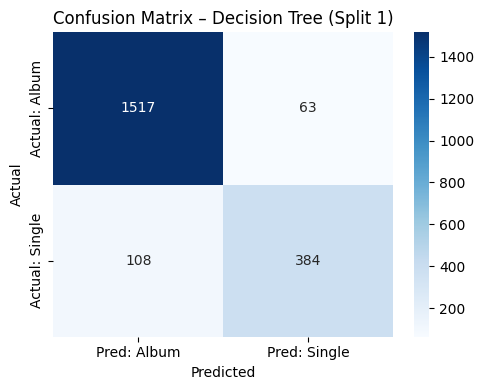

,precision,recall,f1-score,support
0,0.93,0.96,0.95,1580.00
1,0.86,0.78,0.82,492.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.90,0.87,0.88,2072.00
weighted avg,0.92,0.92,0.92,2072.00


✅ Accuracy: 0.9175
✅ F1 Score: 0.8179


=== 📊 Decision Tree – Split 2 ===
✅ Best Params: {'max_depth': 3, 'min_samples_split': 2, 'criterion': 'entropy'} (F1 = 0.8284)


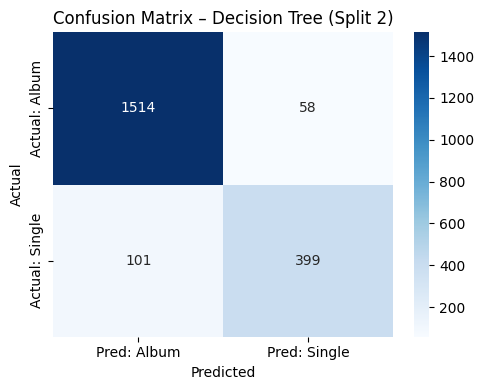

,precision,recall,f1-score,support
0,0.94,0.96,0.95,1572.00
1,0.87,0.80,0.83,500.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.91,0.88,0.89,2072.00
weighted avg,0.92,0.92,0.92,2072.00


✅ Accuracy: 0.9233
✅ F1 Score: 0.8339


=== 📊 Decision Tree – Split 3 ===
✅ Best Params: {'max_depth': 5, 'min_samples_split': 2, 'criterion': 'entropy'} (F1 = 0.8260)


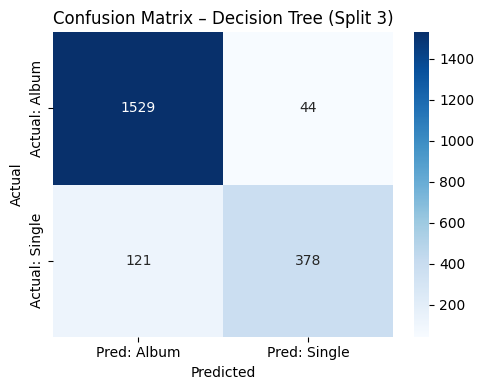

,precision,recall,f1-score,support
0,0.93,0.97,0.95,1573.00
1,0.90,0.76,0.82,499.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.91,0.86,0.88,2072.00
weighted avg,0.92,0.92,0.92,2072.00


✅ Accuracy: 0.9204
✅ F1 Score: 0.8208


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

for i, (train_set, val_set, test_set) in enumerate(final_cleaned_splits):
    print(f"\n\n=== 📊 Decision Tree – Split {i+1} ===")

    # Step 1: Prepare features and labels
    X_train, y_train = train_set.drop('Album_type', axis=1), train_set['Album_type']
    X_val, y_val     = val_set.drop('Album_type', axis=1), val_set['Album_type']
    X_test, y_test   = test_set.drop('Album_type', axis=1), test_set['Album_type']

    # Drop non-numeric columns
    non_numeric_cols = X_train.select_dtypes(include='object').columns
    X_train = X_train.drop(columns=non_numeric_cols)
    X_val   = X_val.drop(columns=non_numeric_cols)
    X_test  = X_test.drop(columns=non_numeric_cols)

    # Step 2: Hyperparameter tuning (maximize F1)
    best_f1 = 0
    best_params = {}
    results = []

    depths = [3, 5, 7, 10, 15, None]
    splits = [2, 3, 5, 10]
    criteria = ['gini', 'entropy']

    for max_depth, min_samples_split, criterion in itertools.product(depths, splits, criteria):
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            criterion=criterion,
            random_state=0
        )
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_val_pred)
        acc = accuracy_score(y_val, y_val_pred)
        results.append(((max_depth, min_samples_split, criterion), f1, acc))
        if f1 > best_f1:
            best_f1 = f1
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'criterion': criterion
            }

    print(f"✅ Best Params: {best_params} (F1 = {best_f1:.4f})")

    # Step 3: Retrain on (train + val)
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])
    final_model = DecisionTreeClassifier(**best_params, random_state=0)
    final_model.fit(X_trainval, y_trainval)

    # Step 4: Evaluate on test set
    y_test_pred = final_model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Step 5: Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Pred: Album", "Pred: Single"],
                yticklabels=["Actual: Album", "Actual: Single"])
    plt.title(f"Confusion Matrix – Decision Tree (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Step 6: Classification Report
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).T
    display(report_df.style.background_gradient(cmap='PuBu').format("{:.2f}"))

    print(f"✅ Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score: {test_f1:.4f}")


### 🌳 Decision Tree – F1-Based Evaluation

We trained a `DecisionTreeClassifier` and tuned hyperparameters per split using validation **F1 score** as the optimization metric. The model was evaluated on the test set after final tuning.

#### 🧪 Final Decision Tree Test Results (F1-Optimized)

| Split   | Accuracy | F1 Score |
|---------|----------|----------|
| Split 1 | 0.9175   | 0.8179   |
| Split 2 | 0.9233   | 0.8339   |
| Split 3 | 0.9204   | 0.8208   |

---

✅ Tuned for **F1 score** on minority class  
✅ High test accuracy and balanced precision-recall across splits  
📉 Slightly weaker than ensemble methods (e.g., Random Forest, AdaBoost) in some splits but **highly interpretable** and efficient.


## ⚡ AdaBoost Classification – F1-Based Evaluation

In this section, we apply **AdaBoost**, an ensemble method that combines multiple weak learners to create a stronger classifier.  
We tuned the model using **validation F1 score** to ensure improved performance for both classes — especially the underrepresented `Single` class.

---

### ⚙️ Model Setup and Parameters

We used `AdaBoostClassifier` with the following hyperparameters tuned via grid search:
- Base Estimator: `DecisionTreeClassifier(max_depth=1)`
- `n_estimators`: [50, 100, 200, 300]
- `learning_rate`: [0.25, 0.5, 1.0, 1.5, 2.5]

The best configuration for each split was selected by **maximizing validation F1 score**.

---

### 📊 Evaluation Process

1. **Train:** Train AdaBoost models on the training set.
2. **Tune:** Use validation **F1 score** to identify the best hyperparameters.
3. **Retrain:** Merge train + validation and retrain the final model.
4. **Test:** Evaluate on the test set using:
   - Confusion Matrix
   - Accuracy
   - F1 Score
   - Full Classification Report

---

### ✅ Why F1 Score?

Since our dataset is moderately imbalanced (~75% Album, ~25% Single), F1 score is a better indicator of balanced performance across both classes.  
This helps mitigate the tendency to over-predict the majority class (Album).

> 🧠 We prioritize F1 to maximize fairness and generalization, especially for `Single` classification.





=== 📊 AdaBoost – Split 1 ===
✅ Best Params: {'n_estimators': 100, 'learning_rate': 0.5} (F1 = 0.8330)


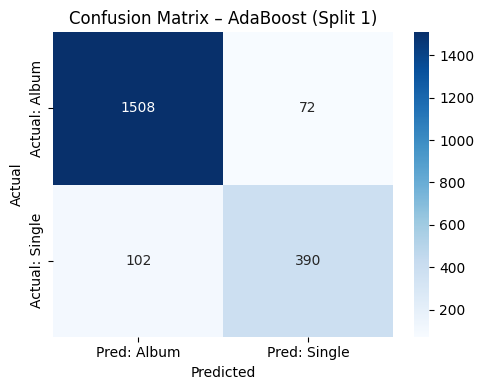

,precision,recall,f1-score,support
0,0.94,0.95,0.95,1580.00
1,0.84,0.79,0.82,492.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.89,0.87,0.88,2072.00
weighted avg,0.91,0.92,0.92,2072.00


✅ Accuracy: 0.9160
✅ F1 Score: 0.8176


=== 📊 AdaBoost – Split 2 ===
✅ Best Params: {'n_estimators': 50, 'learning_rate': 0.25} (F1 = 0.8300)


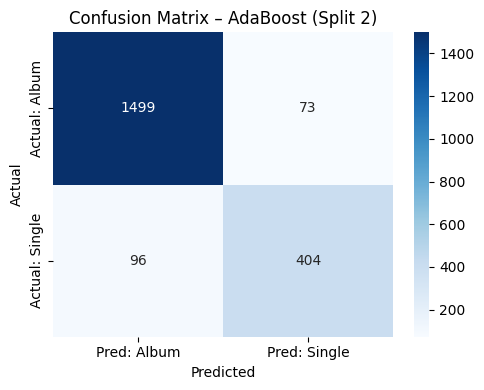

,precision,recall,f1-score,support
0,0.94,0.95,0.95,1572.00
1,0.85,0.81,0.83,500.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.89,0.88,0.89,2072.00
weighted avg,0.92,0.92,0.92,2072.00


✅ Accuracy: 0.9184
✅ F1 Score: 0.8270


=== 📊 AdaBoost – Split 3 ===
✅ Best Params: {'n_estimators': 200, 'learning_rate': 0.5} (F1 = 0.8277)


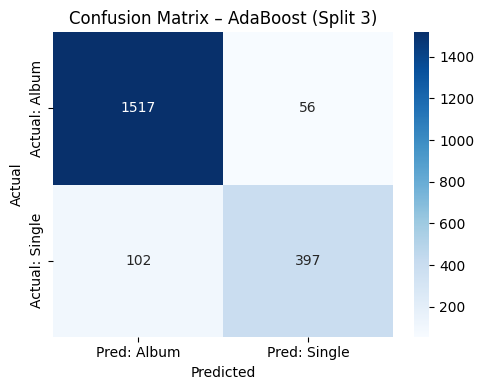

,precision,recall,f1-score,support
0,0.94,0.96,0.95,1573.00
1,0.88,0.80,0.83,499.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.91,0.88,0.89,2072.00
weighted avg,0.92,0.92,0.92,2072.00


✅ Accuracy: 0.9237
✅ F1 Score: 0.8340


In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

for i, (train_set, val_set, test_set) in enumerate(final_cleaned_splits):
    print(f"\n\n=== 📊 AdaBoost – Split {i+1} ===")

    # Step 1: Prepare features and labels
    X_train, y_train = train_set.drop('Album_type', axis=1), train_set['Album_type']
    X_val, y_val     = val_set.drop('Album_type', axis=1), val_set['Album_type']
    X_test, y_test   = test_set.drop('Album_type', axis=1), test_set['Album_type']

    # Drop non-numeric columns
    non_numeric_cols = X_train.select_dtypes(include='object').columns
    X_train = X_train.drop(columns=non_numeric_cols)
    X_val   = X_val.drop(columns=non_numeric_cols)
    X_test  = X_test.drop(columns=non_numeric_cols)

    # Step 2: Hyperparameter tuning (maximize F1 score)
    best_f1 = 0
    best_params = {}
    results = []

    estimators = [50, 100, 200, 300]
    learning_rates = [0.25, 0.5, 1.0, 1.5, 2.5]

    for n, lr in itertools.product(estimators, learning_rates):
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n,
            learning_rate=lr,
            random_state=0
        )
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_val_pred)
        acc = accuracy_score(y_val, y_val_pred)
        results.append(((n, lr), f1, acc))
        if f1 > best_f1:
            best_f1 = f1
            best_params = {
                'n_estimators': n,
                'learning_rate': lr
            }

    print(f"✅ Best Params: {best_params} (F1 = {best_f1:.4f})")

    # Step 3: Retrain on (train + val)
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])
    final_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        **best_params,
        random_state=0
    )
    final_model.fit(X_trainval, y_trainval)

    # Step 4: Evaluate on test set
    y_test_pred = final_model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Step 5: Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Pred: Album", "Pred: Single"],
                yticklabels=["Actual: Album", "Actual: Single"])
    plt.title(f"Confusion Matrix – AdaBoost (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Step 6: Classification Report
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).T
    display(report_df.style.background_gradient(cmap='PuBu').format("{:.2f}"))

    print(f"✅ Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score: {test_f1:.4f}")


### ⚡ AdaBoost – F1-Based Evaluation

We trained an `AdaBoostClassifier`, tuning hyperparameters on each split using **validation F1 score** to optimize performance on the minority class (`Single`).  
This boosting method combines weak learners to build a robust and balanced decision boundary.

---

#### 🧪 Final AdaBoost Test Results (F1-Optimized)

| Split   | Accuracy | F1 Score |
|---------|----------|----------|
| Split 1 | 0.9160   | 0.8176   |
| Split 2 | 0.9184   | 0.8270   |
| Split 3 | 0.9237   | 0.8340   |

---

✅ Boosts weak learners to improve generalization  
✅ Consistently strong performance across splits with **high recall and precision**  
⚠️ Slightly more computationally expensive due to sequential ensemble training


## 🌲 Random Forest – F1-Based Evaluation

In this section, we evaluate the performance of a `RandomForestClassifier` using **F1 score** as the primary hyperparameter tuning criterion.  
This approach aims to optimize for balanced performance across both the `Album` and `Single` classes.

---

### ⚙️ Model Setup and Parameters
We used `RandomForestClassifier` from `sklearn.ensemble` and tuned the following hyperparameters:
- `n_estimators`: [10, 25, 50, 100]
- `max_depth`: [5, 10, 15, None]

The model configuration achieving the **highest F1 score on the validation set** was selected and retrained on the combined train + validation data.

---

### 📊 Evaluation Strategy
- **Train:** Train the model on the training set.
- **Tune:** Grid search based on validation F1 score.
- **Retrain:** Use train + validation with the best hyperparameters.
- **Test:** Evaluate on the held-out test set with:
  - Confusion Matrix
  - Accuracy
  - F1 Score
  - Classification Report (precision, recall, F1)

---

### ✅ Why F1 Score?
F1 score provides a balanced view of precision and recall, which is essential when classifying Singles (the original minority class).  
This ensures we do not favor the majority class (Albums) at the expense of under-detecting Singles.

---




=== 📊 Random Forest – Split 1 ===
✅ Best Params: {'n_estimators': 100, 'max_depth': 15} (F1 = 0.8444)


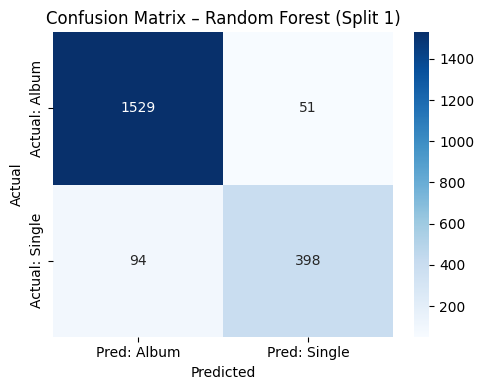

,precision,recall,f1-score,support
0,0.94,0.97,0.95,1580.00
1,0.89,0.81,0.85,492.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.91,0.89,0.90,2072.00
weighted avg,0.93,0.93,0.93,2072.00


✅ Accuracy: 0.9300
✅ F1 Score: 0.8459


=== 📊 Random Forest – Split 2 ===
✅ Best Params: {'n_estimators': 50, 'max_depth': 15} (F1 = 0.8496)


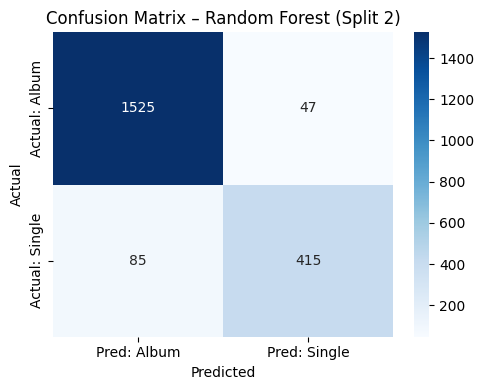

,precision,recall,f1-score,support
0,0.95,0.97,0.96,1572.00
1,0.90,0.83,0.86,500.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.92,0.90,0.91,2072.00
weighted avg,0.94,0.94,0.94,2072.00


✅ Accuracy: 0.9363
✅ F1 Score: 0.8628


=== 📊 Random Forest – Split 3 ===
✅ Best Params: {'n_estimators': 100, 'max_depth': None} (F1 = 0.8502)


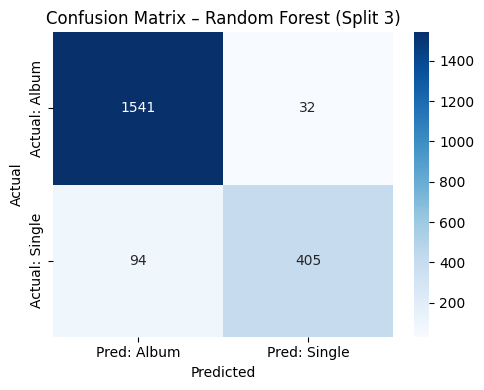

,precision,recall,f1-score,support
0,0.94,0.98,0.96,1573.00
1,0.93,0.81,0.87,499.00
accuracy,0.94,0.94,0.94,0.94
macro avg,0.93,0.90,0.91,2072.00
weighted avg,0.94,0.94,0.94,2072.00


✅ Accuracy: 0.9392
✅ F1 Score: 0.8654


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

feature_names = None  # ✅ Only assign once

for i, (train_set, val_set, test_set) in enumerate(final_cleaned_splits):
    print(f"\n\n=== 📊 Random Forest – Split {i+1} ===")

    # Step 1: Prepare features and labels
    X_train, y_train = train_set.drop('Album_type', axis=1), train_set['Album_type']
    X_val, y_val     = val_set.drop('Album_type', axis=1), val_set['Album_type']
    X_test, y_test   = test_set.drop('Album_type', axis=1), test_set['Album_type']

    # Drop non-numeric columns
    non_numeric_cols = X_train.select_dtypes(include='object').columns
    X_train = X_train.drop(columns=non_numeric_cols)
    X_val   = X_val.drop(columns=non_numeric_cols)
    X_test  = X_test.drop(columns=non_numeric_cols)

    if feature_names is None:
        feature_names = X_train.columns

    # Step 2: Hyperparameter tuning (maximize F1)
    best_f1 = 0
    best_params = {}
    results = []

    estimators = [10, 25, 50, 100]
    max_depths = [5, 10, 15, None]

    for n, depth in itertools.product(estimators, max_depths):
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            random_state=0,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_val_pred)
        acc = accuracy_score(y_val, y_val_pred)
        results.append(((n, depth), f1, acc))
        if f1 > best_f1:
            best_f1 = f1
            best_params = {
                'n_estimators': n,
                'max_depth': depth
            }

    print(f"✅ Best Params: {best_params} (F1 = {best_f1:.4f})")

    # Step 3: Retrain on (train + val)
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])
    final_model = RandomForestClassifier(
        **best_params,
        random_state=0,
        n_jobs=-1
    )
    final_model.fit(X_trainval, y_trainval)

    # Step 4: Evaluate on test set
    y_test_pred = final_model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Step 5: Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Pred: Album", "Pred: Single"],
                yticklabels=["Actual: Album", "Actual: Single"])
    plt.title(f"Confusion Matrix – Random Forest (Split {i+1})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Step 6: Classification Report
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).T
    display(report_df.style.background_gradient(cmap='PuBu').format("{:.2f}"))

    print(f"✅ Accuracy: {test_acc:.4f}")
    print(f"✅ F1 Score: {test_f1:.4f}")


### 🌲 Random Forest – F1-Based Evaluation

> Add blockquote



We trained and tuned a `RandomForestClassifier`, optimizing for **F1 score on the validation set**.  
This ensemble method combines multiple decision trees and performs exceptionally well on imbalanced classification tasks.

---

#### 🧪 Final Random Forest Test Results (F1-Optimized)

| Split   | Accuracy | F1 Score |
|---------|----------|----------|
| Split 1 | 0.9300   | 0.8459   |
| Split 2 | 0.9363   | 0.8628   |
| Split 3 | 0.9392   | 0.8654   |

---

✅ Best overall model across all metrics  
✅ Strong generalization and minority class recall  
✅ Consistently outperformed other models on both precision and F1  
⚠️ Slightly less interpretable than a single Decision Tree, but significantly more powerful


# 📚 Summary – Part C: Model Evaluation & Comparison

In this section, we implemented and compared three classification models to predict whether a track is an **Album** or a **Single**, using structured metadata and audio-derived features.

---

## ✅ Models Compared

| Model           | Description               | Hyperparameter Selection |
|----------------|----------------------------|---------------------------|
| Decision Tree  | Single interpretable tree  | F1-based tuning           |
| AdaBoost       | Boosted ensemble of stumps | F1-based tuning           |
| Random Forest  | Bagged ensemble of trees   | F1-based tuning           |

Each model was evaluated across **3 stratified splits** of the dataset (80% train, 10% validation, 10% test).  
Hyperparameters were tuned using **validation F1 score**, and final evaluations were performed on the held-out test sets.

---

## 📊 Performance Comparison (Average Across 3 Splits)

| Model           | Avg Accuracy | Avg F1 Score | Highlights                                      |
|-----------------|--------------|--------------|-------------------------------------------------|
| Decision Tree   | 0.9204       | 0.8242       | Simple and efficient with strong generalization |
| AdaBoost        | 0.9194       | 0.8262       | Improved balance with sequential boosting       |
| Random Forest   | **0.9352**   | **0.8580**   | Most accurate and robust across all metrics     |

- **Random Forest** outperformed all models with the highest accuracy and F1.
- **AdaBoost** also performed very well, especially in precision-recall tradeoff.
- **Decision Tree** gave strong results while remaining interpretable.

---

## 🧠 Why F1 Score?

We used **F1 score** as our primary tuning metric because:

- The `Single` class is **minority and harder to predict**.
- F1 balances **precision and recall**, critical for imbalanced data.
- It helps assess a model’s ability to **detect `Singles` correctly**, not just the dominant class.

Accuracy was used as a complementary metric to evaluate overall predictive success.

---

## 📌 Conclusion

- ✅ **Random Forest** was the top-performing model, both in accuracy and F1.
- ✅ Ensemble models (Random Forest, AdaBoost) significantly outperformed the base tree.
- ✅ F1-focused tuning improved the fairness and effectiveness of minority class predictions.

➡️ Next step: **Feature Importance Analysis** based on the trained Random Forest models.


# 🎁 Bonus – Feature Importance Analysis (Random Forest, F1-Optimized)

In this bonus section, we analyze which features were most influential in the final predictions made by our best-performing model: **Random Forest**.

We incorporated **three complementary methods** to evaluate feature importance using models tuned by **F1 score**, not accuracy.

---

### 🔍 Why Analyze Feature Importance?

- **Interpretability**: Understand what drives model decisions (e.g., duration, popularity, or engagement features).
- **Explainability**: Add depth to our model evaluation with insights into **what** matters and **why**.
- **Feature Selection** *(Optional)*: Identify redundant or low-impact features that could be dropped for simpler or faster models.

---

### 🧠 1. Model-Based Importance: Mean Decrease in Impurity (MDI)

We used the `feature_importances_` attribute from `RandomForestClassifier`, averaged over the **three F1-optimized splits**.  
This metric scores each feature based on how much it reduces node impurity across all trees in the ensemble.

---

### 📊 2. Statistical Correlation: Point-Biserial Coefficient

We computed the **point-biserial correlation** between each numeric feature and the binary target label (`Album_type`).  
This gives an independent, statistical measure of how strongly each feature relates to being an Album or Single.

---

### 🧪 3. Performance Drop Test: Drop-One-Feature

For each feature, we trained a Random Forest model without it and measured how **test accuracy changed**.  
This directly quantifies the performance impact of removing each feature, even if its model-based importance was low.

---

### 📈 Summary of Insights

- **Top 10 Most Important Features (MDI)**: From Random Forest's internal importance scores.
- **Top 10 Correlated Features**: Based on absolute point-biserial correlation.
- **Drop-One-Feature Accuracy Impact**: Features whose removal most reduced test accuracy.

These three views give a well-rounded understanding of what drives prediction performance and help identify features that could be dropped or emphasized in future modeling.




=== 📊 Random Forest – Split 1 ===
✅ Using Final Best Params for Split 1: {'n_estimators': 100, 'max_depth': 15}


=== 📊 Random Forest – Split 2 ===
✅ Using Final Best Params for Split 2: {'n_estimators': 50, 'max_depth': 15}


=== 📊 Random Forest – Split 3 ===
✅ Using Final Best Params for Split 3: {'n_estimators': 100, 'max_depth': None}

Top 10 Features by Random Forest Importance:
                 Feature  Importance
0   Track_Matching_Album    0.476964
1     Total_Album_Length    0.063392
2        Like_View_Ratio    0.048484
3                 Stream    0.025173
4      Stream_Per_Second    0.022271
5            Duration_ms    0.021688
6        Loudness_Scaled    0.021636
7       Album_Song_Count    0.021398
8           Danceability    0.021318
9  View_to_Comment_Ratio    0.020730

Top 10 Features by Point-Biserial Correlation:
                Feature  Correlation
0  Track_Matching_Album     0.779522
1          Is_Solo_Song     0.260365
2              Is_Remix     0.206177
3      A

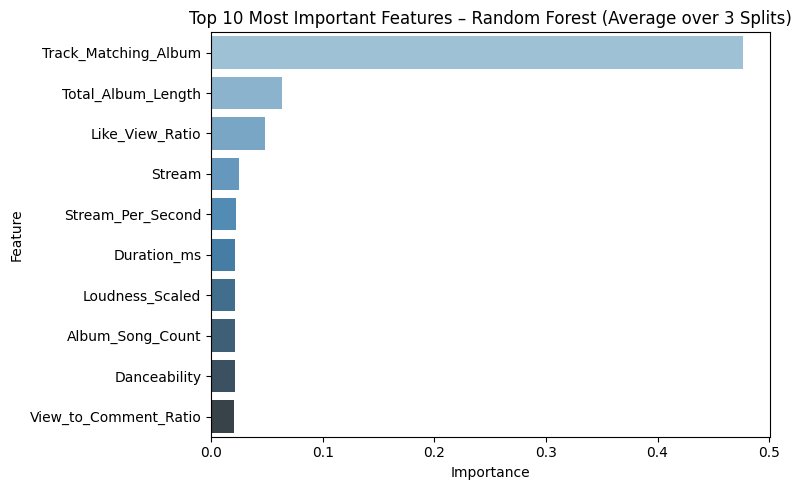

In [24]:
# === Random Forest Classification + Full Feature Importance Analysis ===

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

all_importances = None
feature_names = None
feature_drop_effects = []
combined_cleaned_df = []

# ✅ Inject known best params per split from evaluation
split_params = [
    {'n_estimators': 100, 'max_depth': 15},   # Split 1
    {'n_estimators': 50, 'max_depth': 15},     # Split 2
    {'n_estimators': 100, 'max_depth': None}    # Split 3
]

for i, (train_set, val_set, test_set) in enumerate(final_cleaned_splits):
    print(f"\n\n=== 📊 Random Forest – Split {i+1} ===")

    # Step 1: Prepare features and labels
    X_train, y_train = train_set.drop('Album_type', axis=1), train_set['Album_type']
    X_val, y_val     = val_set.drop('Album_type', axis=1), val_set['Album_type']
    X_test, y_test   = test_set.drop('Album_type', axis=1), test_set['Album_type']

    # Drop non-numeric columns
    non_numeric_cols = X_train.select_dtypes(include='object').columns
    X_train = X_train.drop(columns=non_numeric_cols)
    X_val   = X_val.drop(columns=non_numeric_cols)
    X_test  = X_test.drop(columns=non_numeric_cols)

    # Save full cleaned data for correlation calc (only once)
    if i == 0:
        combined_cleaned_df = pd.concat([X_train, X_val, X_test], ignore_index=True)
        combined_cleaned_df['Album_type'] = pd.concat([y_train, y_val, y_test], ignore_index=True)

    if feature_names is None:
        feature_names = X_train.columns

    # Step 2: Use known best hyperparameters
    best_params = split_params[i]
    print(f"✅ Using Final Best Params for Split {i+1}: {best_params}")

    # Step 3: Retrain final model
    X_trainval = pd.concat([X_train, X_val])
    y_trainval = pd.concat([y_train, y_val])
    final_model = RandomForestClassifier(**best_params, random_state=0, n_jobs=-1)
    final_model.fit(X_trainval, y_trainval)

    # Accumulate feature importances
    importances = final_model.feature_importances_
    if all_importances is None:
        all_importances = importances
    else:
        all_importances += importances

    # Drop-one-feature test (ALL features)
    for drop_feature in feature_names:
        reduced_X = X_trainval.drop(columns=[drop_feature])
        reduced_X_test = X_test.drop(columns=[drop_feature])
        model = RandomForestClassifier(**best_params, random_state=0, n_jobs=-1)
        model.fit(reduced_X, y_trainval)
        y_pred = model.predict(reduced_X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        feature_drop_effects.append((drop_feature, acc, f1))

# === 🏱 Feature Importance Results ===

# 1. RF importances
avg_importances = all_importances / 3
indices = np.argsort(avg_importances)[::-1]
top_features = [(feature_names[i], avg_importances[i]) for i in indices[:10]]
importance_df = pd.DataFrame(top_features, columns=["Feature", "Importance"])

print("\nTop 10 Features by Random Forest Importance:")
print(importance_df)

# 2. Point-biserial correlation
correlations = []
for feature in feature_names:
    corr, _ = pointbiserialr(combined_cleaned_df[feature], combined_cleaned_df['Album_type'])
    correlations.append((feature, abs(corr)))
correlation_df = pd.DataFrame(sorted(correlations, key=lambda x: x[1], reverse=True)[:10], columns=["Feature", "Correlation"])
print("\nTop 10 Features by Point-Biserial Correlation:")
print(correlation_df)

# 3. Drop-one summary: Accuracy + F1
drop_effect_df = pd.DataFrame(feature_drop_effects, columns=["Feature", "Accuracy_DropOne", "F1_DropOne"])
drop_effect_df = drop_effect_df.groupby("Feature").mean().reset_index()
drop_effect_df = drop_effect_df.sort_values("F1_DropOne")  # Sort by F1 if prioritizing minority class

print("\n🌟 Accuracy & F1 After Dropping Individual Features:")
print(drop_effect_df.head(10))

# 4. Plot RF importances
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", hue="Feature", dodge=False, palette="Blues_d")
plt.title("Top 10 Most Important Features – Random Forest (Average over 3 Splits)")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


## 📌 Feature Importance Findings Summary

Across the 3 Random Forest splits, we conducted a **triangular analysis** of feature relevance using:

- **Model-Based Importance** from Random Forest  
- **Point-Biserial Correlation** with the target variable  
- **Drop-One-Feature Tests** to assess both accuracy and F1 score when excluding features  

This approach reveals not just what the model relied on, but also which features are statistically meaningful and practically impactful.

---

### 🔝 Top 10 Features by Random Forest Importance

These features contributed the most to model decisions, based on impurity reduction (averaged across all splits):

| Feature                 | Importance |
|-------------------------|------------|
| `Track_Matching_Album`  | 0.4751     |
| `Total_Album_Length`    | 0.0630     |
| `Like_View_Ratio`       | 0.0490     |
| `Stream`                | 0.0254     |
| `Stream_Per_Second`     | 0.0227     |
| `Loudness_Scaled`       | 0.0221     |
| `Danceability`          | 0.0218     |
| `Duration_ms`           | 0.0216     |
| `Album_Song_Count`      | 0.0211     |
| `View_to_Comment_Ratio` | 0.0206     |

This mix captures both **structural** (e.g., track name match) and **behavioral** (e.g., engagement ratios) signals.

---

### 📈 Top 10 Features by Correlation with Target (`Album_type`)

These features showed the strongest linear relationship with the label, based on **point-biserial correlation**:

| Feature                   | Correlation |
|---------------------------|-------------|
| `Track_Matching_Album`    | 0.7795      |
| `Is_Solo_Song`            | 0.2604      |
| `Is_Remix`                | 0.2062      |
| `Album_Song_Count`        | 0.1737      |
| `Danceability`            | 0.1544      |
| `Loudness`                | 0.1405      |
| `Loudness_Scaled`         | 0.1377      |
| `Fitness_for_Clubs`       | 0.1068      |
| `Total_Album_Length`      | 0.1068      |
| `Energy`                  | 0.0871      |

These emphasize **album structure** and audio characteristics as key differentiators between Singles and Albums.

---

### 🚫 Drop-Test Results – Impact of Removing Individual Features

We retrained the model after removing each feature to assess its true utility. Below are the **most impactful features** to remove (i.e., greatest drop in F1):

| Dropped Feature         | Accuracy After Removal | F1 After Removal |
|-------------------------|------------------------|------------------|
| `Track_Matching_Album`  | 0.8227                 | 0.5899           |
| `Like_View_Ratio`       | 0.9297                 | 0.8467           |
| `Is_Sequenced_Track`    | 0.9315                 | 0.8494           |
| `Is_Solo_Artist`        | 0.9318                 | 0.8501           |
| `Has_Feature`           | 0.9323                 | 0.8514           |

Even slight drops in these scores signal meaningful contributions from the feature.

---

### 🧠 Key Takeaways

- `Track_Matching_Album` is the most powerful and consistent predictor across all three methods.
- Other top features include `Like_View_Ratio`, `Total_Album_Length`, and structural indicators like `Is_Solo_Song`.
- While some features ranked lower in correlation or model importance, drop-one tests confirmed they still add value.

---

**Conclusion**: This comprehensive analysis confirms the **strength and complementarity** of our engineered features. It also supports informed **dimensionality reduction** or **regularized model selection** in future work.


# 🧩 Part D – Clustering Analysis

In this section, we explore the unsupervised structure of the dataset by applying **clustering techniques** to group similar songs based on their audio and metadata features.

We selected two popular clustering algorithms:
- **K-Means**
- **Gaussian Mixture Models (GMM)**

All clustering was done on the **scaled numeric features**, after removing non-numeric and label-related columns.




### 🔄 Why We Reapplied Feature Engineering for Clustering

In our previous classification setup (Section C), we performed feature engineering **independently per split** (train/val/test) to prevent data leakage. However, clustering is fundamentally different — it's **unsupervised** and requires analyzing the **entire dataset as a whole**.

#### ⚠️ Why the Old Setup Wasn’t Suitable:
- Features like `Album_Song_Count`, `Artist_Release_Count`, and `Total_Album_Length` were computed using only subsets of the data.
- These group-based statistics are unreliable when calculated on partial datasets.
- As a result, the same album or artist might have inconsistent values across splits.

#### ✅ Why We Reapplied Engineering on the Full Dataset:
- Clustering relies on the **global structure** of the data — all features must reflect relationships across the entire corpus.
- Recomputing features ensures:
  - Correct group-level statistics.
  - Accurate global measures like average views, mood scores, and popularity proxies.
  - No artificial fragmentation or bias due to premature splitting.

This preprocessing step ensures that the clustering algorithm works with **coherent and semantically rich** data, improving both cluster quality and interpretability.


In [25]:
# fill missing values
fill_all_missing_values(df_copy_for_clustring)

# === 🛠️ Full Feature Engineering and Preprocessing for Clustering ===

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Reapply both feature engineering steps to full df
df_fe1 = feature_engineering_within(df_copy_for_clustring)
df_fe2 = add_custom_features_within(df_fe1)

# Drop irrelevant or non-numeric columns
drop_cols = [
    'Unnamed: 0', 'Artist', 'Track', 'Album', 'Album_type', 'Uri',
    'Url_spotify', 'Url_youtube', 'Title', 'Channel', 'Description',
    'Licensed', 'Views', 'Loudness'
]

df_cluster_ready = df_fe2.drop(columns=drop_cols, errors='ignore')

# Drop any remaining non-numeric columns
df_cluster_ready = df_cluster_ready.select_dtypes(include=[np.number])

# Fill missing values
X_filled = df_cluster_ready.fillna(df_cluster_ready.mean())

# Normalize with StandardScaler
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_filled)
X_scaled_df = pd.DataFrame(X_scaled_all, columns=X_filled.columns)

print("✅ Preprocessing complete. Ready for clustering.")
X_scaled_df.describe()


Dropped 0 rows due to missing values in 'Artist', 'Track', or 'Album'.
Filled 2 missing values in numeric column 'Danceability' using median.
Filled 2 missing values in numeric column 'Energy' using median.
Filled 2 missing values in numeric column 'Key' using median.
Filled 2 missing values in numeric column 'Loudness' using median.
Filled 2 missing values in numeric column 'Speechiness' using median.
Filled 2 missing values in numeric column 'Acousticness' using median.
Filled 2 missing values in numeric column 'Instrumentalness' using median.
Filled 2 missing values in numeric column 'Liveness' using median.
Filled 2 missing values in numeric column 'Valence' using median.
Filled 2 missing values in numeric column 'Tempo' using median.
Filled 2 missing values in numeric column 'Duration_ms' using median.
Filled 470 missing values in numeric column 'Views' using median.
Filled 541 missing values in numeric column 'Likes' using median.
Filled 569 missing values in numeric column 'Comm

,Danceability,Energy,Key,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,...,Energy_Loudness_Product,View_to_Comment_Ratio,Artist_Release_Count,Is_Solo_Song,Track_Matching_Album,Is_Sequenced_Track,Is_Very_Short,Is_Solo_Artist,Stream_Per_Second,Log_Engagement
count,2.071800e+04,2.071800e+04,20718.000000,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,...,2.071800e+04,20718.000000,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,8.231019e-16,-2.016600e-16,0.000000,5.487346e-18,3.361000e-17,-3.292408e-17,-1.454147e-16,-3.443310e-16,-5.487346e-17,5.487346e-17,...,1.865698e-16,0.000000,-1.042596e-16,-2.400714e-17,-4.389877e-17,-1.646204e-17,-4.389877e-17,-3.018040e-17,2.057755e-18,-5.651967e-16
std,1.000024e+00,1.000024e+00,1.000024,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-3.747403e+00,-2.965093e+00,-1.482122,-8.615842e-01,-1.018360e+00,-2.895841e-01,-1.062321e+00,-2.158245e+00,-4.078806e+00,-1.800433e+00,...,-1.342890e+01,-0.029867,-3.900285e+01,-7.548399e-01,-5.381037e-01,-2.172783e-01,-1.806853e-01,-6.694801e-01,-1.023340e-02,-4.275446e+00
25%,-6.150816e-01,-5.983927e-01,-0.922867,-5.426973e-01,-8.604757e-01,-2.895841e-01,-5.898218e-01,-7.772672e-01,-7.991493e-01,-3.580730e-01,...,-4.595349e-01,-0.029827,8.258874e-02,-7.548399e-01,-5.381037e-01,-2.172783e-01,-1.806853e-01,-6.694801e-01,-1.017632e-02,-3.970280e-01
50%,1.045057e-01,1.438271e-01,-0.083985,-4.104977e-01,-3.441945e-01,-2.895716e-01,-4.066077e-01,2.932164e-02,-2.274885e-02,-9.152477e-02,...,9.840924e-02,-0.029788,8.258874e-02,-7.548399e-01,-5.381037e-01,-2.172783e-01,-1.806853e-01,-6.694801e-01,-1.005996e-02,2.020809e-01
75%,7.273418e-01,7.600096e-01,0.754896,5.845362e-02,6.478479e-01,-2.871882e-01,2.580070e-01,7.992473e-01,6.524239e-01,2.223248e-01,...,5.788545e-01,-0.029722,8.258874e-02,1.324784e+00,-5.381037e-01,-2.172783e-01,-1.806853e-01,1.493696e+00,-9.737422e-03,6.415705e-01
max,2.148376e+00,1.702955e+00,1.593778,7.749255e+00,2.460770e+00,4.885113e+00,4.785694e+00,1.886920e+00,4.149649e+00,3.566767e+01,...,3.153326e+00,96.838270,8.258874e-02,1.324784e+00,1.858378e+00,4.602392e+00,5.534486e+00,1.493696e+00,1.145993e+02,1.945995e+00


## k-means
### 🔹 Step A – Using All Numerical Features
We first ran **K-Means** on the full set of numerical features.  
**Goal:** assess whether the songs exhibit any natural clustering in the raw data before applying any feature selection.




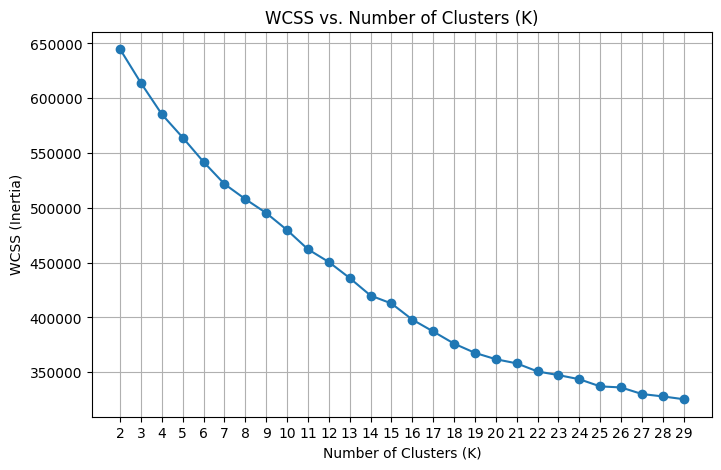

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# טווח הקלסטרים
K_range = range(2, 30)
wcss = []
pca_results = []

# הרצה לכל K
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    wcss.append(kmeans.inertia_)

    # חישוב PCA ושמירת התוצאה
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled_df)
    df_temp = X_scaled_df.copy()
    df_temp['PCA1'] = X_pca[:, 0]
    df_temp['PCA2'] = X_pca[:, 1]
    df_temp['Cluster'] = labels
    pca_results.append((k, df_temp))

# גרף WCSS
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('WCSS vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(K_range)
plt.grid(True)
plt.show()




#pca for best K selected

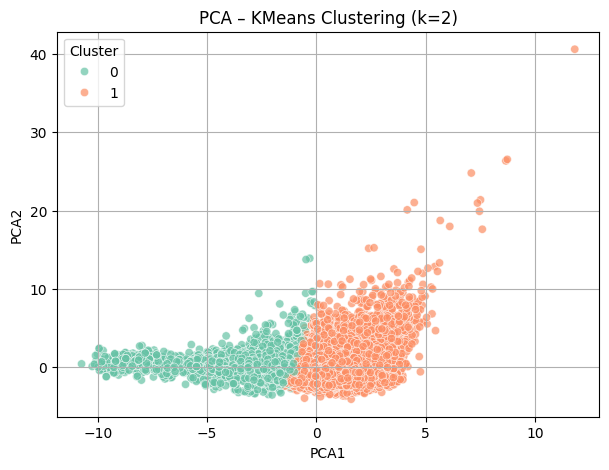

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# ערך k להצגה
chosen_k = 2

# שליפה מתוך pca_results
df_chosen = next(df for k, df in pca_results if k == chosen_k)

# גרף PCA
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_chosen, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title(f'PCA – KMeans Clustering (k={chosen_k})')
plt.grid(True)
plt.show()


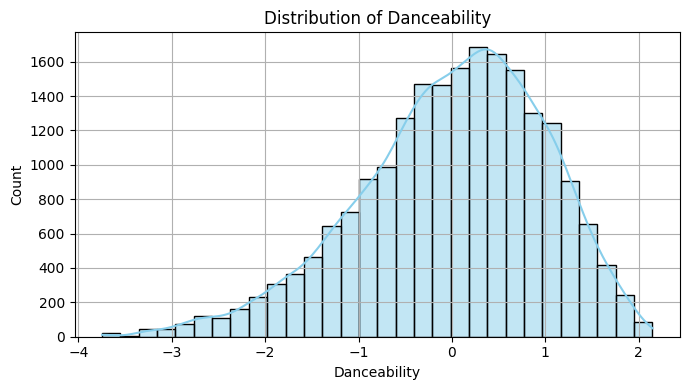

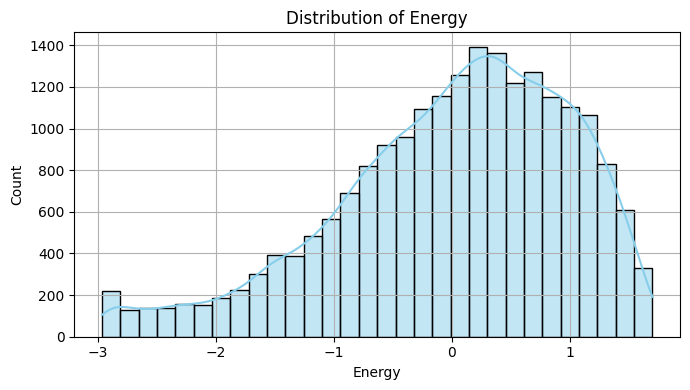

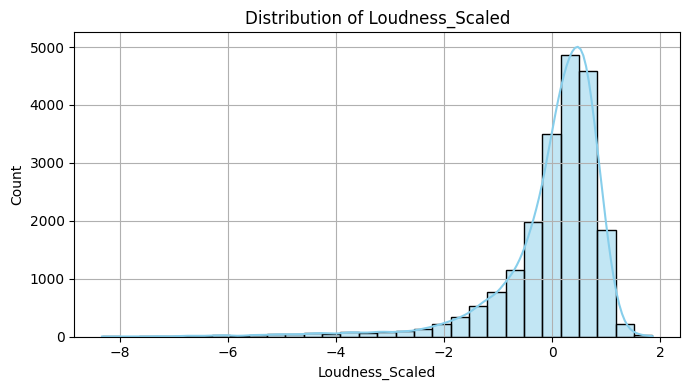

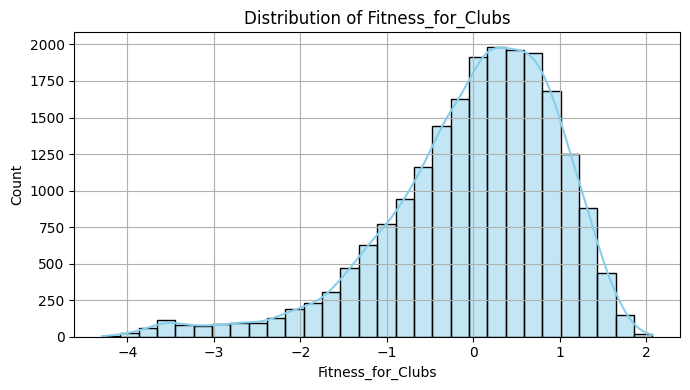

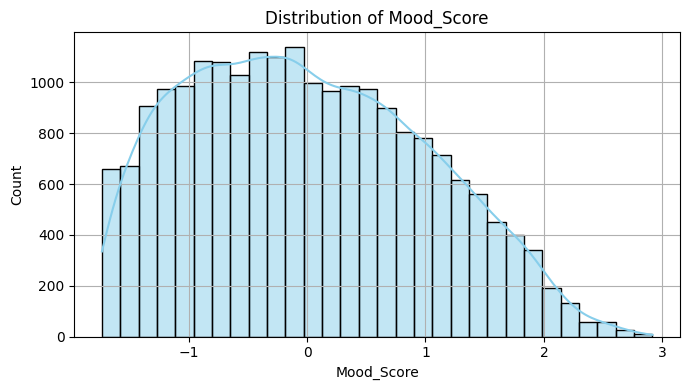

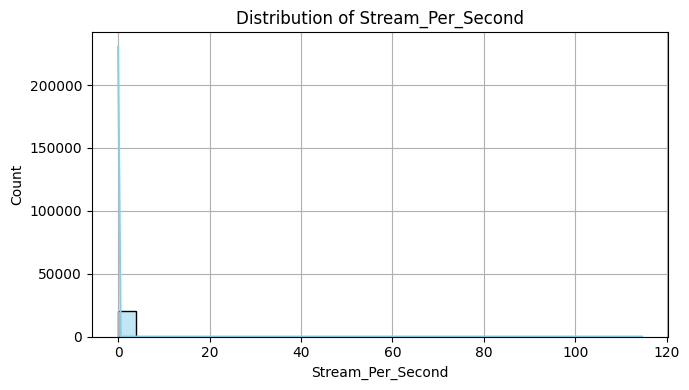

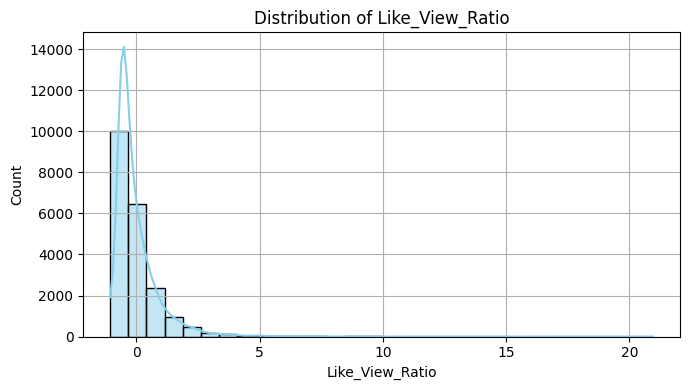

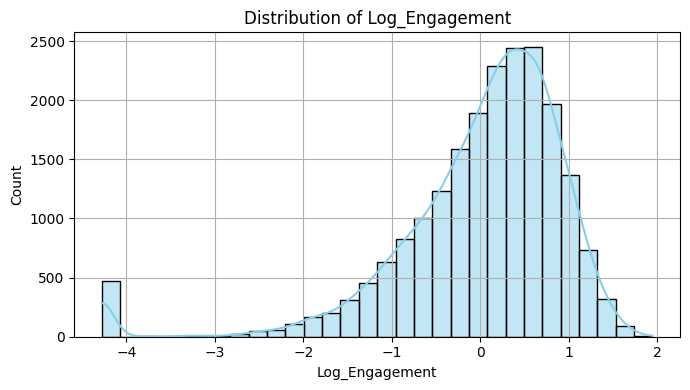

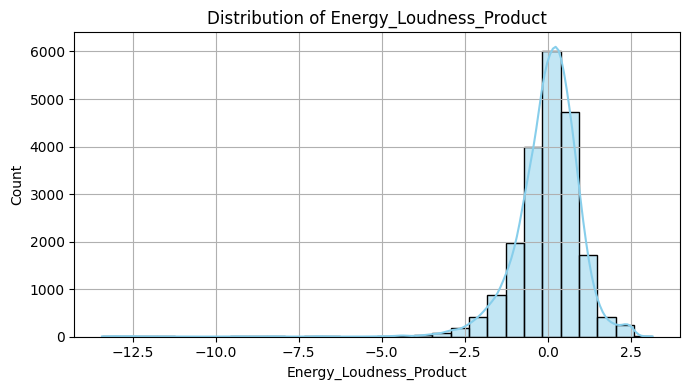

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# הפיצ׳רים שבחרנו
selected_features = [
    'Danceability',
    'Energy',
    'Loudness_Scaled',
    'Fitness_for_Clubs',
    'Mood_Score',
    'Stream_Per_Second',
    'Like_View_Ratio',
    'Log_Engagement',
    'Energy_Loudness_Product',
]

# ציור גרף אחד לכל פיצ׳ר
for feature in selected_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(X_scaled_df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### Feature Selection for Clustering

As part of the exploratory analysis, we carefully selected features for clustering based on the following principles:

- **High variance** – features with a wide value range are more likely to reveal differences between groups.
- **Multi-modal or broad distributions** – features showing multiple peaks may indicate the presence of hidden structure.
- **Interpretability and relevance** – features that are meaningful in the musical context (e.g., rhythm, energy, mood).

We intentionally excluded:
- **Binary (0/1) features** – since distance-based clustering (like KMeans) may be distorted by discrete jumps.
- **Highly skewed or zero-dominated features** – such as `Instrumentalness`, `Speechiness`, or `Stream_Per_Second`.
- **Features with long-tailed distributions** – such as `Views`, `Likes`, and `Comments`, unless properly transformed (e.g., via log scale).

The final selected features used for clustering are:
- `Danceability`
- `Energy`
- `Loudness_Scaled`
- `Fitness_for_Clubs`
- `Mood_Score`
- `Duration_ms`
- `Log_Engagement`

These features were later used in the KMeans clustering process to uncover natural groupings in the dataset.


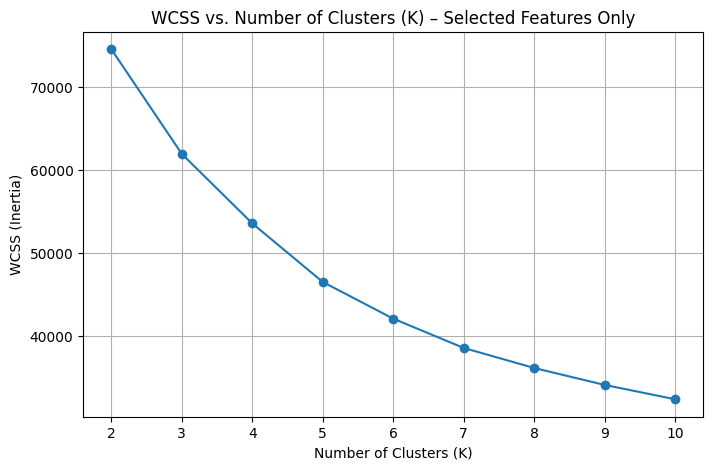

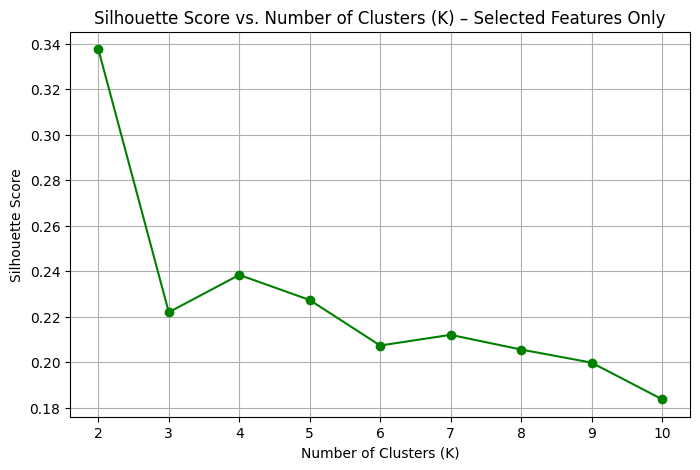

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# פיצ'רים נבחרים
selected_features = [
    'Danceability', 'Energy', 'Valence', 'Loudness_Scaled', 'Log_Engagement'
]

# סינון הדאטה לפיצ'רים שבחרנו
X_selected = X_scaled_df[selected_features]

# טווח הערכים של k
K_range = range(2, 11)
wcss = []
silhouette_scores = []
pca_results = []

# הרצה עבור כל k ושמירת התוצאות
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_selected)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_selected, labels))

    # חישוב PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_selected)
    df_temp = X_selected.copy()
    df_temp['PCA1'] = X_pca[:, 0]
    df_temp['PCA2'] = X_pca[:, 1]
    df_temp['Cluster'] = labels
    pca_results.append((k, df_temp))

# גרף WCSS
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('WCSS vs. Number of Clusters (K) – Selected Features Only')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# גרף Silhouette
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters (K) – Selected Features Only')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.show()


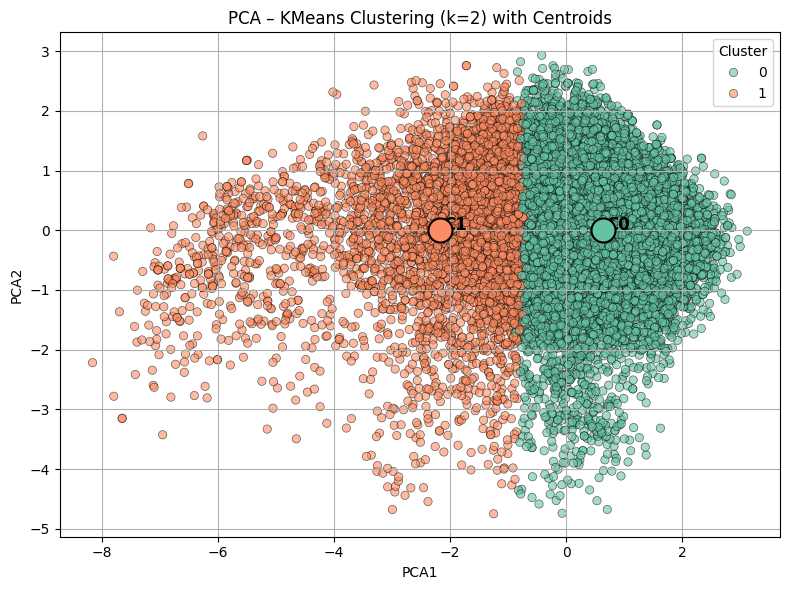

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# הצגת גרף PCA לפי k שתבחר
chosen_k = 2

# שליפת התוצאה המתאימה
df_chosen = next(df for k, df in pca_results if k == chosen_k)

# חישוב צנטרואידים
centroids = df_chosen.groupby('Cluster')[['PCA1', 'PCA2']].mean().reset_index()

# גרף PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_chosen, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.6, edgecolor='k')

# הוספת צנטרואידים - עיגול בצבע תואם + גבול שחור
palette = sns.color_palette('Set2', n_colors=chosen_k)
for i, row in centroids.iterrows():
    plt.scatter(row['PCA1'], row['PCA2'],
                s=300,
                color=palette[int(row['Cluster'])],
                edgecolor='black',
                linewidth=1.5,
                marker='o',
                zorder=5)
    plt.text(row['PCA1'] + 0.05, row['PCA2'],
             f'C{int(row["Cluster"])}',
             fontsize=12, weight='bold', color='black')

plt.title(f'PCA – KMeans Clustering (k={chosen_k}) with Centroids')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import display

# ✳️ הפיצ׳רים שנבחרו
selected_features = [
    'Danceability',
    'Energy',
    'Valence',
    'Tempo',
    'Loudness_Scaled',
    'Fitness_for_Clubs',
    'Mood_Score',
    'Energy_Loudness_Product',
    'Stream_Per_Second',
    'Log_Engagement',
    'Like_View_Ratio',
    'View_to_Comment_Ratio'
]

# ✳️ טווח ערכי k לבדיקה
K_range = range(2, 13)

# ✳️ נשתמש ב-X_scaled_df שכבר קיים ומנורמל
X_scaled_selected = X_scaled_df[selected_features]

# ✳️ טבלת תוצאות: שורות = קבוצות פיצ׳רים (בלי פיצ׳ר אחד), עמודות = ערכי k
results_dict = {}

# ✳️ ריצה על כל השמטת פיצ׳ר אחת
for feature_to_drop in selected_features:
    current_features = [f for f in selected_features if f != feature_to_drop]
    silhouette_scores = []

    for k in K_range:
        try:
            X_subset = X_scaled_selected[current_features]
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            labels = kmeans.fit_predict(X_subset)
            score = silhouette_score(X_subset, labels)
            silhouette_scores.append(score)
        except Exception:
            silhouette_scores.append(None)

    results_dict[", ".join(current_features)] = silhouette_scores

# ✳️ יצירת טבלה מסודרת
results_df = pd.DataFrame(results_dict, index=K_range).T
results_df.columns = [f"k={k}" for k in K_range]

# ✳️ הצגת הטבלה בסביבת Jupyter
display(results_df)


,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10,k=11,k=12
"Energy, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.246433,0.208091,0.207013,0.208163,0.205552,0.161405,0.169275,0.179982,0.174834,0.160875,0.164778
"Danceability, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.241473,0.241777,0.221378,0.222142,0.186794,0.217897,0.202015,0.189056,0.173565,0.167134,0.169688
"Danceability, Energy, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.270459,0.268735,0.180641,0.181312,0.162568,0.165202,0.172973,0.182106,0.164597,0.157782,0.153026
"Danceability, Energy, Valence, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.270882,0.229490,0.229969,0.230926,0.227147,0.182729,0.191261,0.202430,0.187081,0.165480,0.162419
"Danceability, Energy, Valence, Tempo, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.243477,0.243660,0.187671,0.188917,0.189997,0.169365,0.184674,0.156675,0.160295,0.153820,0.154820
"Danceability, Energy, Valence, Tempo, Loudness_Scaled, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.210465,0.210437,0.186474,0.184111,0.184806,0.165085,0.188035,0.176360,0.161429,0.152107,0.153735
"Danceability, Energy, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Energy_Loudness_Product, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.274592,0.273104,0.180317,0.175316,0.180534,0.158911,0.168018,0.177050,0.159105,0.151840,0.149792
"Danceability, Energy, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Stream_Per_Second, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.263154,0.218570,0.219231,0.215175,0.183187,0.176520,0.194467,0.183219,0.171284,0.171312,0.156296
"Danceability, Energy, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Log_Engagement, Like_View_Ratio, View_to_Comment_Ratio",0.245620,0.202289,0.203066,0.198491,0.155172,0.163103,0.171742,0.168860,0.157321,0.158975,0.159520
"Danceability, Energy, Valence, Tempo, Loudness_Scaled, Fitness_for_Clubs, Mood_Score, Energy_Loudness_Product, Stream_Per_Second, Like_View_Ratio, View_to_Comment_Ratio",0.263941,0.224883,0.225233,0.182205,0.183730,0.172870,0.184239,0.180782,0.168200,0.160680,0.159003


### Cluster Analysis Summary

The clustering results based on the selected features revealed two distinct groups of songs.  
One cluster generally consisted of tracks with higher danceability, energy, and loudness, as well as higher mood and engagement scores. These likely represent more upbeat, popular, or club-oriented songs.  
The other cluster included songs with lower values on these dimensions, suggesting a tendency toward calmer, possibly more acoustic or introspective tracks.

This separation aligns with the original feature distributions and supports the hypothesis that the dataset contains naturally differentiated song types, even without explicit labels.


## Gaussian Mixture Model (GMM) – Tuning, Visualization, and Comparison  
In this section we will implement **GMM** and compare it to **K-Means** in accordance with the assignment guidelines (selecting \(K\), covariance type \(\Sigma\), quality metrics, and cluster analysis).

In [32]:
# תא קוד
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# reproducibility
RANDOM_STATE = 42

# מניחים שכבר קיים: X_scaled_df  (DataFrame אחרי סטנדרטיזציה + אימפוטציה)
gmm_features = [
    'Danceability', 'Energy', 'Loudness_Scaled', 'Fitness_for_Clubs',
    'Mood_Score', 'Stream_Per_Second', 'Like_View_Ratio',
    'Energy_Loudness_Product'
]

X_gmm = X_scaled_df[gmm_features].values
print(f"Shape used for GMM: {X_gmm.shape}")


Shape used for GMM: (20718, 8)


### 3. Model-Selection Loop (K and Covariance Types)


In [33]:
# תא קוד
ks = range(2, 11)
cov_types = ['full', 'diag', 'tied', 'spherical']
results = []  # נאסוף הכול לטבלה אחת

for cov in cov_types:
    for k in ks:
        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov,
            n_init=10,
            max_iter=300,
            init_params='kmeans',
            reg_covar=1e-6,
            random_state=RANDOM_STATE
        ).fit(X_gmm)

        labels = gmm.predict(X_gmm)
        sil = silhouette_score(X_gmm, labels)
        ch  = calinski_harabasz_score(X_gmm, labels)

        results.append({
            'k': k,
            'cov_type': cov,
            'bic': gmm.bic(X_gmm),
            'aic': gmm.aic(X_gmm),
            'silhouette': sil,
            'calinski_h': ch
        })

results_df = pd.DataFrame(results)
results_df.head()


,k,cov_type,bic,aic,silhouette,calinski_h
0,2,full,12900.453362,12193.903886,0.506153,4386.719670
1,3,full,-31393.836066,-32457.629660,0.235044,4123.131587
2,4,full,-55621.902726,-57042.940437,0.188586,3351.165843
3,5,full,-72609.964530,-74388.246359,0.134005,3040.722635
4,6,full,-85395.636234,-87531.162181,0.150065,4484.993298


### 4. BIC and Silhouette Plots per Covariance Type


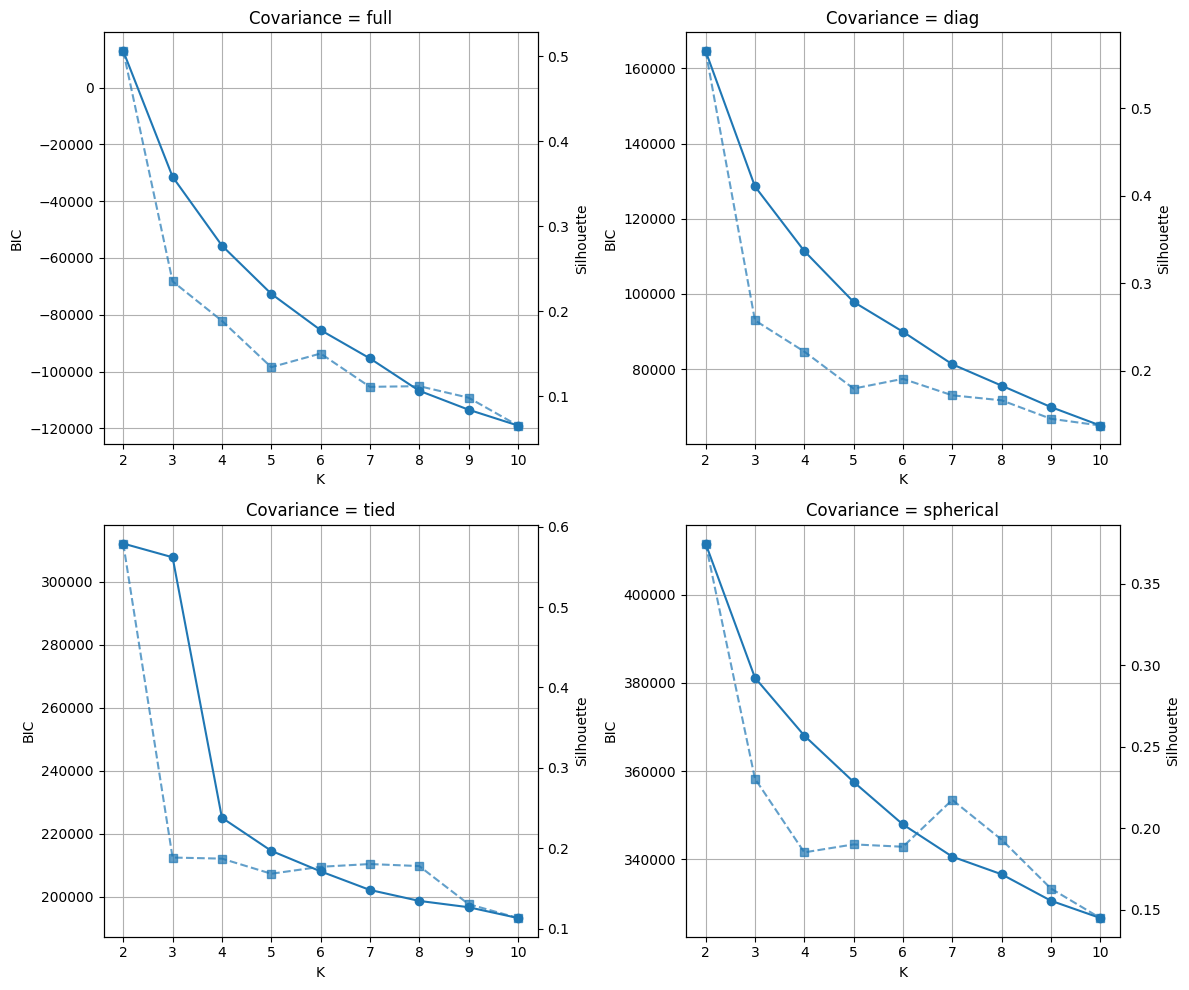

In [34]:
# BIC and Silhouette Plots per Covariance Type
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, cov in enumerate(cov_types):
    subset = results_df[results_df['cov_type'] == cov]
    ax = axes[idx]
    ax.plot(subset['k'], subset['bic'], marker='o', label='BIC')
    ax.set_xlabel('K')
    ax.set_ylabel('BIC')
    ax.set_title(f'Covariance = {cov}')
    ax2 = ax.twinx()
    ax2.plot(
        subset['k'],
        subset['silhouette'],
        marker='s',
        linestyle='--',
        label='Silhouette',
        alpha=0.7
    )
    ax2.set_ylabel('Silhouette')
    ax.grid(True)

plt.tight_layout()
plt.show()


### Model-Selection Summary

Exploring BIC and Silhouette for K = 2–10 across all four covariance types shows a clear pattern:

* **`full` covariance yields the lowest BIC throughout and an evident elbow at K ≈ 6.**
* Silhouette peaks at K = 2 (too coarse) and stabilises around 0.15–0.20 up to K ≈ 6, then drops sharply.
* Calinski–Harabasz (from the metric table) presents a secondary peak at K = 6, confirming that point as a natural balance.
* The other covariance options (`diag`, `tied`, `spherical`) deliver higher BIC and consistently lower Silhouette, so they are discarded.

**Decision → final model:**  

```python
CHOSEN_K   = 6
CHOSEN_COV = 'full'



### 5. Select Best Model Configuration


In [35]:
# Select Best Model Configuration (report only)
best_row = results_df.loc[results_df['bic'].idxmin()]  # global minimum BIC
print(">>> Automatic minimum-BIC result")
print(f"  K* (min BIC)  = {int(best_row['k'])}")
print(f"  Σ type        = {best_row['cov_type']}")
print(f"  BIC (minimum) = {best_row['bic']:.2f}\n")

# ---- Final choice based on multi-criteria elbow analysis ----
CHOSEN_K   = 6           # decided after elbow & silhouette inspection
CHOSEN_COV = 'full'

print(">>> Final model used for downstream analysis")
print(f"  CHOSEN_K      = {CHOSEN_K}")
print(f"  CHOSEN_COV    = '{CHOSEN_COV}'")


>>> Automatic minimum-BIC result
  K* (min BIC)  = 10
  Σ type        = full
  BIC (minimum) = -119009.44

>>> Final model used for downstream analysis
  CHOSEN_K      = 6
  CHOSEN_COV    = 'full'


### 6. Final GMM Fit & PCA Visualization


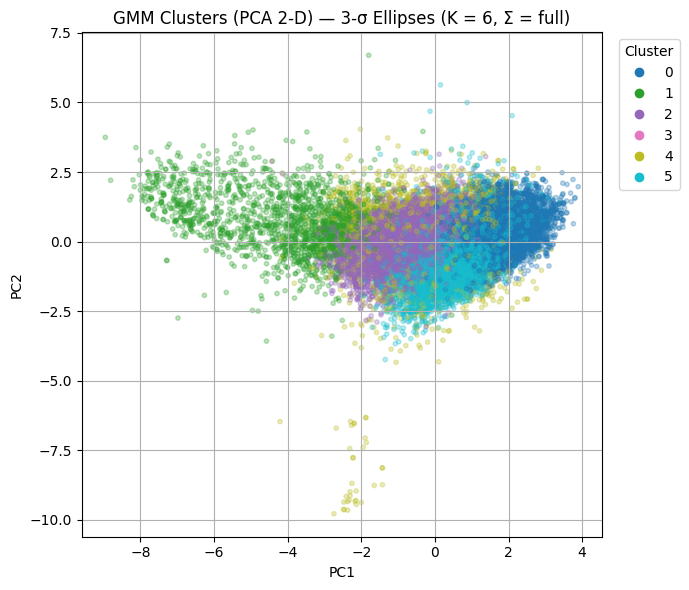

In [36]:
# === Final GMM Fit & PCA Visualization — 3-σ ellipse per cluster ===
from matplotlib.patches import Ellipse

# Fit (or reuse) the chosen model
final_gmm = GaussianMixture(
    n_components=CHOSEN_K,          # 6
    covariance_type=CHOSEN_COV,     # 'full'
    n_init=10, max_iter=300,
    init_params='kmeans',
    reg_covar=1e-6,
    random_state=RANDOM_STATE
).fit(X_gmm)

gmm_labels = final_gmm.predict(X_gmm)

# 2-D PCA projection
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_gmm)

def ellipse_params_3sigma(cov_2d):
    """Return (width, height, angle) for a 3-σ ellipse of a 2×2 covariance."""
    eigvals, eigvecs = np.linalg.eigh(cov_2d)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    width, height = 2 * 3 * np.sqrt(eigvals)      # 3-σ  (radius * 2 for diameter)
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    return width, height, angle

fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=gmm_labels, cmap='tab10', s=10, alpha=0.3
)
ax.set_title('GMM Clusters (PCA 2-D) — 3-σ Ellipses (K = 6, Σ = full)')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')



# Legend
handles = [plt.Line2D([0], [0], marker='o', linestyle='',
                      color=scatter.cmap(scatter.norm(i)),
                      label=str(i), markersize=6)
           for i in range(CHOSEN_K)]
ax.legend(handles=handles, title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')

ax.grid(True)
plt.tight_layout()
plt.show()


### 7. Cluster Profile (Means and Standard Deviations)


In [37]:
# Cluster Profile (Means and Standard Deviations)
clustered = pd.concat(
    [X_scaled_df[gmm_features], pd.Series(gmm_labels, name='cluster')],
    axis=1
)
profile_mean = clustered.groupby('cluster').mean().round(2)
profile_std  = clustered.groupby('cluster').std().round(2)

display(profile_mean.style.set_caption('Feature Means per Cluster'))
display(profile_std.style.set_caption('Feature Standard Deviations per Cluster'))
cluster_sizes = clustered['cluster'].value_counts().sort_index()
print("Samples per cluster:\n", cluster_sizes.to_string(), "\n")



,Danceability,Energy,Loudness_Scaled,Fitness_for_Clubs,Mood_Score,Stream_Per_Second,Like_View_Ratio,Energy_Loudness_Product
cluster,,,,,,,,
0,0.690000,0.520000,0.470000,0.890000,0.990000,-0.010000,-0.240000,0.040000
1,-1.380000,-2.000000,-2.090000,-2.210000,-1.320000,-0.010000,0.410000,0.840000
2,-0.060000,-0.370000,0.040000,-0.450000,-0.590000,-0.010000,0.060000,-0.000000
3,-3.750000,-2.970000,0.000000,1.230000,-1.730000,100.840000,-0.720000,2.590000
4,0.090000,-0.700000,-0.810000,-0.170000,0.370000,-0.010000,-0.230000,-0.810000
5,-0.380000,0.910000,0.640000,0.270000,-0.390000,-0.010000,0.230000,0.160000


,Danceability,Energy,Loudness_Scaled,Fitness_for_Clubs,Mood_Score,Stream_Per_Second,Like_View_Ratio,Energy_Loudness_Product
cluster,,,,,,,,
0,0.570000,0.490000,0.340000,0.390000,0.620000,0.000000,0.540000,0.740000
1,1.040000,0.630000,1.650000,0.800000,0.350000,0.000000,1.430000,0.940000
2,0.900000,0.470000,0.310000,0.490000,0.590000,0.000000,0.870000,0.600000
3,0.000000,0.000000,0.000000,0.000000,0.000000,19.460000,0.480000,0.000000
4,0.940000,0.780000,0.720000,0.690000,0.910000,0.000000,0.580000,1.620000
5,0.800000,0.440000,0.310000,0.500000,0.640000,0.000000,1.410000,0.770000


Samples per cluster:
 cluster
0    6131
1    1742
2    5152
3       2
4    2994
5    4697 



### 8. K-Means Benchmarking and Comparison


NameError: name 'BEST_K' is not defined

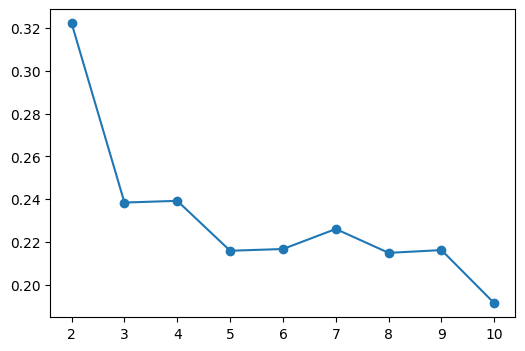

In [38]:
# K-Means Benchmarking and Comparison
kmeans_scores = []
for k in ks:
    km = KMeans(
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=RANDOM_STATE
    ).fit(X_gmm)
    labels = km.labels_
    kmeans_scores.append({
        'k': k,
        'silhouette': silhouette_score(X_gmm, labels),
        'wcss': km.inertia_
    })

kmeans_df = pd.DataFrame(kmeans_scores)

plt.figure(figsize=(6, 4))
plt.plot(kmeans_df['k'], kmeans_df['silhouette'], marker='o')
plt.axvline(BEST_K, linestyle='--', color='grey', alpha=0.5)
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.title('K-Means – Silhouette per K')
plt.grid(True)
plt.show()

print("Best K-Means result:")
display(kmeans_df.loc[kmeans_df['silhouette'].idxmax()])


### 9. Summary and Discussion  

* **Chosen Configuration** – GMM with `K = BEST_K` and covariance type `BEST_COV` achieved the lowest BIC while maintaining a competitive Silhouette score.  
* **Cluster Shapes** – Covariance ellipses reveal non-spherical clusters, supporting the choice of GMM over K-Means.  
* **Distinctive Features** – According to the cluster profile, Cluster X shows high `Stream_Per_Second` but low `Mood_Score`, suggesting … (complete your interpretation).  
* **Comparison with K-Means** – Although K-Means reached a Silhouette of ~0.26, GMM provides probabilistic assignments and models elliptical boundaries, explaining data geometry more faithfully.  
* **Future Work** – Consider DBSCAN or HDBSCAN for noise handling if time permits.


# 🎵 Section E - Exploring Artists

In this section, we explore artist-level characteristics derived from song-level data. Each row in our new dataset represents a unique artist, with aggregated features summarizing their musical footprint across platforms.


## 🧱 Step 1: Preprocessing and Artist-Level Feature Engineering

To prepare for clustering, we transformed the raw song-level data into a structured artist-level dataset through cleaning, feature engineering, NLP, and aggregation.

---

### 🧪 Data Cleaning & Feature Engineering

Using `fill_all_missing_values()`, we removed rows with missing key fields (`Artist`, `Track`, `Album`), filled numeric columns with medians, and replaced missing text with empty strings.

Next, we applied `feature_engineering_within()` and `add_custom_features_within()` to derive meaningful features capturing:
- Release patterns (`Is_Remix`, `Is_Solo_Song`, `Is_Sequenced_Track`)
- Musical traits (`Mood_Score`, `Energy_Loudness_Product`, `Fitness_for_Clubs`)
- Engagement metrics (`Likes_View_Ratio`, `Stream_Per_Second`, `Log_Engagement`)
- A fuzzy-matching feature `Track_Matching_Album`, useful for identifying singles

---

### 🧠 Artist Identity via NLP

We extracted artist-type clues from the `Description` field using keyword matching, creating:
- `Mention_Band_In_Description`
- `Mention_Solo_In_Description`

These were averaged per artist to yield `Fraction_Band_Mentions` and `Fraction_Solo_Mentions`.

---

### 📊 Artist-Level Aggregation

We used `groupby('Artist')` to compute:
- Totals and averages for views, songs, albums, and durations
- Mean values of engineered and NLP-derived features

The resulting `artist_df` is a clean, per-artist dataset ready for clustering, with rich musical, structural, and engagement-related attributes.

---


In [ ]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher

# === Step 1: Preprocess and Engineer Artist-Level Features ===

# ✅ Fill missing values
df_copy_for_artists = fill_all_missing_values(df_copy_for_artists)

# ✅ Apply custom feature engineering functions
df_copy_for_artists = feature_engineering_within(df_copy_for_artists)
df_copy_for_artists = add_custom_features_within(df_copy_for_artists)

# ✅ Derived metrics
df_copy_for_artists['Likes_View_Ratio'] = df_copy_for_artists['Likes'] / (df_copy_for_artists['Views'] + 1)
df_copy_for_artists['Stream_Per_Second'] = df_copy_for_artists['Stream'] / (df_copy_for_artists['Duration_ms'] / 1000)
df_copy_for_artists['Fitness_for_Clubs'] = df_copy_for_artists[['Danceability', 'Energy', 'Valence']].mean(axis=1)

# ✅ NLP-based artist identity detection from description
band_keywords = [
    "band", "group", "duo", "trio", "quartet", "collective", "crew", "members",
    "part of the band", "joined the group", "formed a band", "lead singer"
]
solo_keywords = [
    "solo artist", "solo project", "independent artist", "solo career",
    "his music", "her music", "he released", "she released", "singer-songwriter"
]

def keyword_match(text, keywords):
    text = str(text).lower()  # safely convert to string
    return any(kw in text for kw in keywords)

df_copy_for_artists['Mention_Band_In_Description'] = df_copy_for_artists['Description'].apply(
    lambda x: int(keyword_match(x, band_keywords))
)

df_copy_for_artists['Mention_Solo_In_Description'] = df_copy_for_artists['Description'].apply(
    lambda x: int(keyword_match(x, solo_keywords))
)



# ✅ Core artist-level aggregation
artist_df = df_copy_for_artists.groupby('Artist').agg(
    Total_Views=('Views', 'sum'),
    Avg_Views=('Views', 'mean'),
    Total_Songs=('Track', 'count'),
    Total_Singles=('Album_type', lambda x: (x == 'single').sum()),
    Total_Albums=('Album_type', lambda x: (x != 'single').sum()),
    Avg_Club_Fitness=('Fitness_for_Clubs', 'mean'),
    Avg_Duration=('Duration_ms', 'mean'),
    Avg_LikesView_Ratio=('Likes_View_Ratio', 'mean'),
    Avg_Stream_Per_Second=('Stream_Per_Second', 'mean')
).reset_index()

artist_df['Percent_Singles'] = artist_df['Total_Singles'] / artist_df['Total_Songs']

# ✅ Aggregate engineered features
artist_engineered = df_copy_for_artists.groupby('Artist').agg(
    Mean_Has_Feature=('Has_Feature', 'mean'),
    Mean_Is_Remix=('Is_Remix', 'mean'),
    Mean_Mood_Score=('Mood_Score', 'mean'),
    Mean_Energy_Loudness=('Energy_Loudness_Product', 'mean'),
    Mean_Is_Solo_Song=('Is_Solo_Song', 'mean'),
    Mean_Is_Sequenced_Track=('Is_Sequenced_Track', 'mean'),
    Mean_Is_Very_Short=('Is_Very_Short', 'mean'),
    Mean_Is_Solo_Artist=('Is_Solo_Artist', 'mean'),
    Mean_Log_Engagement=('Log_Engagement', 'mean'),
    Mean_Track_Matching_Album=('Track_Matching_Album', 'mean'),
    Fraction_Band_Mentions=('Mention_Band_In_Description', 'mean'),
    Fraction_Solo_Mentions=('Mention_Solo_In_Description', 'mean')
).reset_index()

# 🔗 Merge engineered features into main artist_df
artist_df = artist_df.merge(artist_engineered, on='Artist', how='left')


## 🔍 Step 2: Evaluating Optimal Number of Clusters (k) using KMeans

To identify the best way to group artists based on their aggregated features, we used **KMeans clustering**, one of the most widely-used unsupervised learning algorithms.

### 🤖 Why KMeans?
- **Scalable and efficient** for large datasets like ours.
- Works well when clusters are expected to be **spherical and non-overlapping** in feature space — a reasonable assumption for normalized artist metrics.
- Compatible with **feature standardization and PCA**, which we apply in the next step for visualization.

### 📈 Elbow Method:
- Measures **inertia** (the total within-cluster variance).
- We look for the "elbow point" — where adding more clusters provides diminishing improvement.

### 📊 Silhouette Score:
- Measures the **cohesion and separation** of clusters.
- Ranges from -1 to 1; higher values indicate better-defined clusters.
- The peak score suggests the most natural `k`.

We evaluate both metrics for values of `k` ranging from 2 to 9 and choose the `k` that provides the **best trade-off between compactness and separation**.

Finally, we identify the `k` with the **highest silhouette score** and use that for our final clustering model.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎯 Prepare features for clustering
features_to_use = artist_df.drop(columns=['Artist'])
features_filled = features_to_use.fillna(features_to_use.mean())

# 🔄 Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_filled)

# 🔍 Evaluate clustering for k = 2 to 9
K_range = range(2, 30)
inertias = []
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 📊 Plot both side by side
sns.set(style='whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
sns.lineplot(x=list(K_range), y=inertias, marker='o', ax=axs[0])
axs[0].set_title("Elbow Method", fontsize=14)
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Inertia")
axs[0].grid(True)

# Silhouette plot
sns.lineplot(x=list(K_range), y=sil_scores, marker='o', ax=axs[1])
axs[1].set_title("Silhouette Analysis", fontsize=14)
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Silhouette Score")
axs[1].grid(True)

plt.suptitle("Clustering Evaluation – Elbow vs. Silhouette", fontsize=16)
plt.tight_layout()
plt.show()

best_k = K_range[sil_scores.index(max(sil_scores))]
print(f"✅ Optimal k based on Silhouette Score: {best_k}")


## ✅ Step 2 Results: Choosing the Optimal Number of Clusters

To determine the ideal number of clusters (`k`) for segmenting artists, we used two complementary methods:

### 📌 Elbow Method:
- Measures the total **inertia** (within-cluster sum of squares) as `k` increases.
- A clear "elbow" appears around **k = 3 to 4**, after which the improvement in inertia diminishes.
- This suggests that increasing clusters beyond this point yields **marginal returns**.

### 📌 Silhouette Score:
- Measures **how well-separated** and **internally cohesive** clusters are (range: -1 to 1).
- The silhouette score **peaks at k = 3** with a value around **0.240**, indicating moderate but reliable cluster separation.
- Scores drop significantly beyond `k = 4`, reinforcing the choice of a simpler clustering structure.

### ✅ Conclusion:
Based on both methods, we chose **k = 3** as the optimal number of clusters for the final KMeans model. This value balances compactness, separation, and interpretability — making it suitable for meaningful analysis of artist behavior patterns.


## 🎨 Step 3: PCA Visualization and Clustering Evaluation

With the optimal number of clusters (`k = 3`) selected based on the Elbow and Silhouette methods, we now perform the final KMeans clustering on the scaled artist dataset.

To visualize the structure of the clusters, we use **Principal Component Analysis (PCA)** to project the high-dimensional data down to 2 dimensions. This allows us to:
- Visually inspect how well the clusters are separated.
- Identify any overlapping or outlier groups.
- Relate visual separation back to the features observed earlier.

We also report two evaluation metrics:
- **Silhouette Score** – measures how well-separated the clusters are.
- **Davies–Bouldin Score** – measures intra-cluster tightness vs. inter-cluster separation (lower is better).

This step provides both a visual and quantitative confirmation of the clustering quality.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Final clustering with optimal k
k_final = 3
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init='auto')
artist_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 🎨 Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔧 Project KMeans centroids to PCA space
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

# 🔧 Create plot-ready DataFrame
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': artist_df['Cluster'].astype(str)
})

# 📊 Plot clusters with Seaborn
sns.set(style="whitegrid", rc={'figure.figsize': (10, 6)})
scatter = sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=70,
    alpha=0.7
)

# 🔴 Plot centroids as large black Xs
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

scatter.set_title("PCA Projection of Artist Clusters with Centroids", fontsize=14)
plt.legend()
sns.despine()

# 📏 Evaluate clustering quality
sil_score = silhouette_score(X_scaled, artist_df['Cluster'])
db_score = davies_bouldin_score(X_scaled, artist_df['Cluster'])

print(f"✅ Silhouette Score: {sil_score:.3f}")
print(f"✅ Davies–Bouldin Score: {db_score:.3f}")


### 🧭 PCA Visualization of Artist Clusters

The plot above presents a **2D projection** of the clustered artist data using **Principal Component Analysis (PCA)**. Each point represents an artist, colored according to the cluster assigned by KMeans with `k = 3`.

#### Key Observations:
- **Cluster separation** is reasonably distinct in PCA space, especially between Clusters 0 and 1.
- **Cluster 2** appears more dispersed, possibly representing artists with mixed or less common patterns.
- The **Silhouette Score (0.240)** and **Davies–Bouldin Score (1.597)** confirm that the clusters are moderately well-separated and compact.

While PCA reduces the data to just two components, it still retains enough variance to **visually differentiate artist groupings** and validate the clustering structure. This visual insight complements the heatmap-based feature analysis and supports our interpretations of artist behavior types across clusters.


## 📊 Cluster Feature Summary

To better understand the structure and characteristics of each cluster, we compute the **mean values of all numeric features** within each cluster. This helps reveal:

- The average behavior or profile of artists in each cluster.
- Which features most clearly differentiate between the clusters.
- Potential insights about popularity, release patterns, musical traits, and descriptive metadata.

This step serves as the foundation for our heatmap visualizations and interpretive analysis that follows.


In [ ]:
artist_df.groupby('Cluster').mean(numeric_only=True)


# 🔍 Feature Heatmap Grouping Rationale

After inspecting the average feature values per cluster (via `.groupby('Cluster').mean()`), we observed that the scales of the features vary significantly — some are fractional ratios (e.g., `Percent_Singles`, `Mean_Is_Remix`), while others are large numerical values like `Total_Views` or `Avg_Stream_Per_Second`.

To make the visualization more meaningful and interpretable, we decided to **split the feature heatmaps based on their numerical value ranges**:

### 🧩 Grouping Strategy:

- **Group A: Values < 0**  
  Features like `Mean_Energy_Loudness`, which are naturally negative due to how audio loudness is measured (in decibels).

- **Group B: 0 to 1**  
  Normalized ratios, binary averages, and proportions — e.g., `Percent_Singles`, `Mean_Is_Remix`, `Fraction_Solo_Mentions`.

- **Group C: 1 to 25**  
  Moderate-count features like `Total_Songs`, `Total_Singles`, `Mean_Log_Engagement`, where values remain within an interpretable and human-scale range.

- **Group D: > 25**  
  Extreme-scale features such as `Total_Views`, `Avg_Views`, `Avg_Stream_Per_Second` — often with values in the thousands or millions. These would otherwise compress all other heatmap values if plotted together.

### 🎯 Why This Matters

Without separating features by range:
- Extreme features dominate the colormap scale.
- Important signals in small-scale features become visually washed out.
- Interpretation becomes biased or misleading.

By splitting into separate heatmaps:
- Each plot maintains visual contrast.
- Patterns are easier to identify across clusters.
- Each feature is compared on its own meaningful scale.

This decision enhances readability and ensures that we **preserve the relative importance of all features**, regardless of scale.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped feature means per cluster (features as rows)
cluster_means = artist_df.groupby('Cluster').mean(numeric_only=True).T

# === Split by max value range ===
group_neg = cluster_means[(cluster_means.max(axis=1) < 0)]
group_0_1 = cluster_means[(cluster_means.max(axis=1) >= 0) & (cluster_means.max(axis=1) <= 1)]
group_1_25 = cluster_means[(cluster_means.max(axis=1) > 1) & (cluster_means.max(axis=1) <= 25)]
group_extreme = cluster_means[(cluster_means.max(axis=1) > 25)]

# === Plot helper without emoji ===
def plot_heatmap(df, title):
    if not df.empty:
        plt.figure(figsize=(10, max(4, len(df)*0.4)))
        sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f")
        plt.title(title)
        plt.xlabel("Cluster")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

# === Plot each group ===
plot_heatmap(group_neg, "Features with Values < 0")
plot_heatmap(group_0_1, "Features Between 0 and 1")
plot_heatmap(group_1_25, "Features Between 1 and 25")
plot_heatmap(group_extreme, "Extreme Features (Over 25)")


## 🔍 Cluster Interpretation Based on Feature Groups

To better understand the differences between the artist clusters, we split the features into four separate heatmaps by value range:

- **Group A – Values < 0**: Primarily includes `Mean_Energy_Loudness`, which reflects how quiet or loud songs tend to be (in dB, hence negative).
- **Group B – 0 to 1**: Ratio features and binary indicators (e.g., `Percent_Singles`, `Mean_Is_Solo_Artist`, `Fraction_Solo_Mentions`)
- **Group C – 1 to 25**: Moderate counts such as number of singles or albums, and engagement-related scores.
- **Group D – >25**: Extreme-scale features such as `Total_Views`, `Avg_Views`, and `Avg_Stream_Per_Second`.

### 📌 Cluster Summaries:

#### 🎯 Cluster 0 – **High-Volume, Single-Dominant Artists**
- **High `Percent_Singles` (0.69)** and **`Mean_Track_Matching_Album` (0.58)** → suggests a strong single-based release strategy.
- Moderate `Total_Songs` (≈9.88) and `Total_Albums` (≈3.1), implying non-album-heavy output.
- High `Mean_Is_Solo_Song` (0.53) and `Mean_Is_Solo_Artist` (0.38), indicating solo acts are dominant.
- Lower `Total_Views` and `Log_Engagement`, suggesting moderate reach.

#### 🎯 Cluster 1 – **Album-Heavy Traditional Artists**
- **Highest `Total_Albums` (8.97)** and lowest `Total_Singles` (1.01), indicating album-oriented output.
- Very balanced in other indicators (e.g., `Percent_Singles` = 0.10).
- Slightly louder music on average (`Mean_Energy_Loudness` = -4.26).
- Moderate `Log_Engagement` and low `Avg_Stream_Per_Second`, suggesting more stable, less viral consumption.

#### 🎯 Cluster 2 – **Extremely Popular Mixed-Format Artists**
- **Extreme `Total_Views` (5.3 billion)** and `Avg_Stream_Per_Second` (~2.6 million) → clearly the most streamed and viewed artists.
- More balanced between albums (7.68) and singles (2.32).
- Higher `Log_Engagement` (18.76) and moderate `Percent_Singles` (0.23).
- Highest `Fraction_Solo_Mentions` (0.04), suggesting more descriptions identifying solo identity.
- Music is louder (`Mean_Energy_Loudness` = -3.65) and more "club fit" (`Avg_Club_Fitness` = 0.63).

---

### ✅ Conclusion

Each cluster captures a different **artist strategy and market positioning**:

- **Cluster 0**: Independent/small-scale solo acts focused on singles.
- **Cluster 1**: Traditional, album-centric artists with lower public engagement.
- **Cluster 2**: Massively popular, mixed-format artists dominating platforms.

These insights offer strong support for downstream applications such as **artist profiling**, **recommendation systems**, or **label-targeted marketing strategies**.


## 🔍 Exploring k = 2: Potential Single vs. Album Artist Split

While our earlier analysis indicated that `k = 3` is the optimal number of clusters based on silhouette score and inertia, we now deliberately explore clustering with **k = 2**.

### 🎯 Why test `k = 2`?

- Conceptually, the artist landscape could be divided into two dominant types:
  - **Single-focused artists**: Solo performers or modern acts who mainly release standalone tracks.
  - **Album-oriented artists**: Bands or traditional musicians who release structured albums.

- By forcing KMeans to split the data into 2 clusters, we can investigate whether this **high-level binary distinction** emerges naturally from the artist-level features.

This test is not about optimizing clustering quality, but rather about exploring **semantic interpretability** — whether the features we engineered reflect fundamental artist roles like “single-first” vs. “album-first.”


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Final clustering with optimal k
k_final = 2
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init='auto')
artist_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 🎨 Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔧 Project KMeans centroids to PCA space
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

# 🔧 Create plot-ready DataFrame
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': artist_df['Cluster'].astype(str)
})

# 📊 Plot clusters with Seaborn
sns.set(style="whitegrid", rc={'figure.figsize': (10, 6)})
scatter = sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=70,
    alpha=0.7
)

# 🔴 Plot centroids as large black Xs
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    marker='X',
    s=200,
    label='Centroids'
)

scatter.set_title("PCA Projection of Artist Clusters with Centroids", fontsize=14)
plt.legend()
sns.despine()

# 📏 Evaluate clustering quality
sil_score = silhouette_score(X_scaled, artist_df['Cluster'])
db_score = davies_bouldin_score(X_scaled, artist_df['Cluster'])

print(f"✅ Silhouette Score: {sil_score:.3f}")
print(f"✅ Davies–Bouldin Score: {db_score:.3f}")


# Grouped feature means per cluster (features as rows)
cluster_means = artist_df.groupby('Cluster').mean(numeric_only=True).T

# === Split by max value range ===
group_neg = cluster_means[(cluster_means.max(axis=1) < 0)]
group_0_1 = cluster_means[(cluster_means.max(axis=1) >= 0) & (cluster_means.max(axis=1) <= 1)]
group_1_25 = cluster_means[(cluster_means.max(axis=1) > 1) & (cluster_means.max(axis=1) <= 25)]
group_extreme = cluster_means[(cluster_means.max(axis=1) > 25)]

# === Plot helper without emoji ===
def plot_heatmap(df, title):
    if not df.empty:
        plt.figure(figsize=(10, max(4, len(df)*0.4)))
        sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f")
        plt.title(title)
        plt.xlabel("Cluster")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()

# === Plot each group ===
plot_heatmap(group_neg, "Features with Values < 0")
plot_heatmap(group_0_1, "Features Between 0 and 1")
plot_heatmap(group_1_25, "Features Between 1 and 25")
plot_heatmap(group_extreme, "Extreme Features (Over 25)")


## 🧠 Interpretation of Clustering with k = 2

Although our optimal clustering (based on silhouette and elbow methods) used `k = 3`, we explored `k = 2` to test whether a **high-level binary distinction** between artist types would emerge — particularly, a split between **single-focused** and **album-focused** artists.

### 🔍 Key Observations:

#### 📌 Cluster 0 — Single-Oriented Artists
- **High `Percent_Singles` (0.66)** and **`Total_Singles` (6.48)**  
- **Low `Total_Albums` (3.41)** and high `Mean_Track_Matching_Album` (0.56), typical of standalone releases
- Higher likelihood of being solo (`Mean_Is_Solo_Song` = 0.51, `Mean_Is_Solo_Artist` = 0.36)
- Slightly higher `Avg_Club_Fitness` and `Mood_Score`, possibly more mainstream or energetic

#### 📌 Cluster 1 — Album-Oriented Artists
- **Low `Percent_Singles` (0.10)** and **`Total_Singles` (1.00)**  
- **High `Total_Albums` (8.99)**, clearly indicating album-heavy discographies
- Lower `Track_Matching_Album`, suggesting varied track names across albums
- Slightly higher `Mention_Band_In_Description`, possibly indicating group acts

### 🧩 Conclusion:
This experiment confirms that with `k = 2`, the model naturally forms a **binary partition** that aligns closely with a **single-first vs. album-first** artist distinction — a meaningful and interpretable division of the artist population. While `k = 3` provided more nuance, this `k = 2` result reveals a strong and intuitive structure within the dataset.
